In [1]:
library(mgcv)#linear regression
library(psych)
library(ggplot2)
library(corrplot)# correlation plot
library(RColorBrewer) # color
library(WVPlots)
library(reshape2)
library(lars)
library(MASS)
library(glmnet)# Lasso, ridge regression
library(dplyr) # %>%
library(data.table) #fread
library(gridExtra) # Combine different plots
library(ridge) # ridge regression

Loading required package: nlme

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.

Warning message:
"package 'psych' was built under R version 3.6.3"
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.84 loaded

Warning message:
"package 'WVPlots' was built under R version 3.6.3"
Loading required package: wrapr

Warning message:
"package 'wrapr' was built under R version 3.6.3"

Attaching package: 'wrapr'


The following object is masked from 'package:mgcv':

    %.%


Warning message:
"package 'reshape2' was built under R version 3.6.3"
Loaded lars 1.2



Attaching package: 'lars'


The following object is masked from 'package:psych':

    error.bars


Warning messa

In [ ]:
mycolor = brewer.pal(9, "Set1")

# input aggregration data

In [2]:
df = read.csv("../../data/tidy/system-model-19-04.csv")

In [3]:
head(df)

,X,year,month,day,hour,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,...,accel_bin_2_time_hr,accel_bin_3_time_hr,accel_bin_4_time_hr,accel_bin_5_time_hr,avg_interval_speed_mph,avg_hour_speed_mph,ridership,weekends_weekday,TAVG,energy_kwh
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1,NA,5,1,0,766.80982,20518.943889,20488.48333,10.211944,8.805278,...,14.068333333,19059.505833,8.20055556,3.3375000,21.70410,0.03737082,NA,NA,NA,NA
2,2,NA,5,1,1,224.00092,1433.453056,1424.07694,2.443333,3.037500,...,2.736944444,1424.177222,1.35333333,1.2955556,26.08955,0.15626666,NA,NA,NA,NA
3,3,NA,5,1,2,83.01897,5.771944,1.76750,1.313056,1.537222,...,0.001666667,3.003056,0.01305556,0.5802778,23.04987,14.38318945,NA,NA,NA,NA
4,4,2019,4,1,0,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,1561.0,2,42,40.567
5,5,2019,4,1,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,171.7,2,42,35.110
6,6,2019,4,1,10,1157.92787,117.502778,63.17194,21.106944,15.074167,...,33.216944444,52.217500,15.46083333,5.1025000,19.38688,9.85447235,19134.9,2,42,53.894


# correlation matrix

In [4]:
df = df [-(1:5),]
df = df [,-(1:5)]

In [3]:
head(df)

,X,year,month,day,hour,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,...,accel_bin_2_time_hr,accel_bin_3_time_hr,accel_bin_4_time_hr,accel_bin_5_time_hr,avg_interval_speed_mph,avg_hour_speed_mph,ridership,weekends_weekday,TAVG,energy_kwh
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1,NA,5,1,0,766.80982,20518.943889,20488.48333,10.211944,8.805278,...,14.068333333,19059.505833,8.20055556,3.3375000,21.70410,0.03737082,NA,NA,NA,NA
2,2,NA,5,1,1,224.00092,1433.453056,1424.07694,2.443333,3.037500,...,2.736944444,1424.177222,1.35333333,1.2955556,26.08955,0.15626666,NA,NA,NA,NA
3,3,NA,5,1,2,83.01897,5.771944,1.76750,1.313056,1.537222,...,0.001666667,3.003056,0.01305556,0.5802778,23.04987,14.38318945,NA,NA,NA,NA
4,4,2019,4,1,0,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,1561.0,2,42,40.567
5,5,2019,4,1,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,171.7,2,42,35.110
6,6,2019,4,1,10,1157.92787,117.502778,63.17194,21.106944,15.074167,...,33.216944444,52.217500,15.46083333,5.1025000,19.38688,9.85447235,19134.9,2,42,53.894


In [3]:
df = df [-(1:5),]

In [6]:
# Remove dummy variables 
df_var_plot = df[,-16]
df_var_plot = na.omit(df_var_plot)
matrix = cor(df_var_plot)

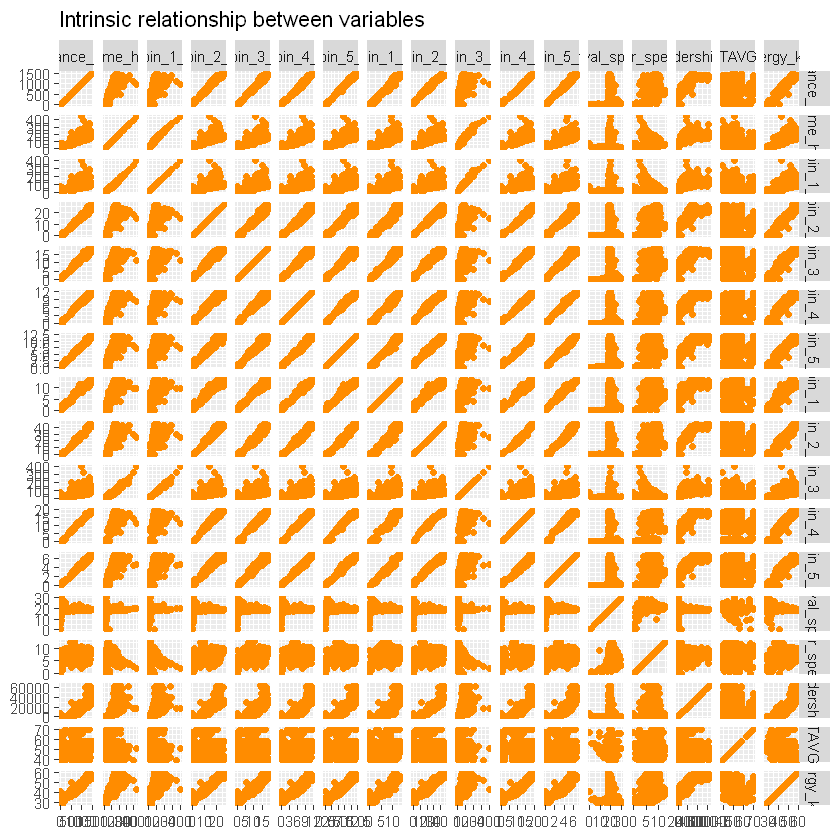

In [7]:
# Plot correlaton scattered plot
options(repr.plot.width = 10, repr.plot.height = 10)
#png("../../figures/Intrinsic-relationship-plot-April-2019.png",height=6000,width=6000,res=360)
PairPlot(df_var_plot,colnames(df_var_plot),"Intrinsic relationship between variables", palette=NULL,point_color = "darkorange")
#dev.off()
# correleation plot with numbers
options(repr.plot.width = 20, repr.plot.height = 20)
#png("../../figures/correleation-plot-April-2019.png",height=5000,width=5000,res=360)
corrplot(corr = matrix,method = "color",order = "hclust",tl.col="black",addrect=4,addCoef.col = "grey")
#dev.off()
options(repr.plot.width = 10, repr.plot.height = 10)
pairs.panels(df_var_plot, 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE, # show correlation ellipses
             )

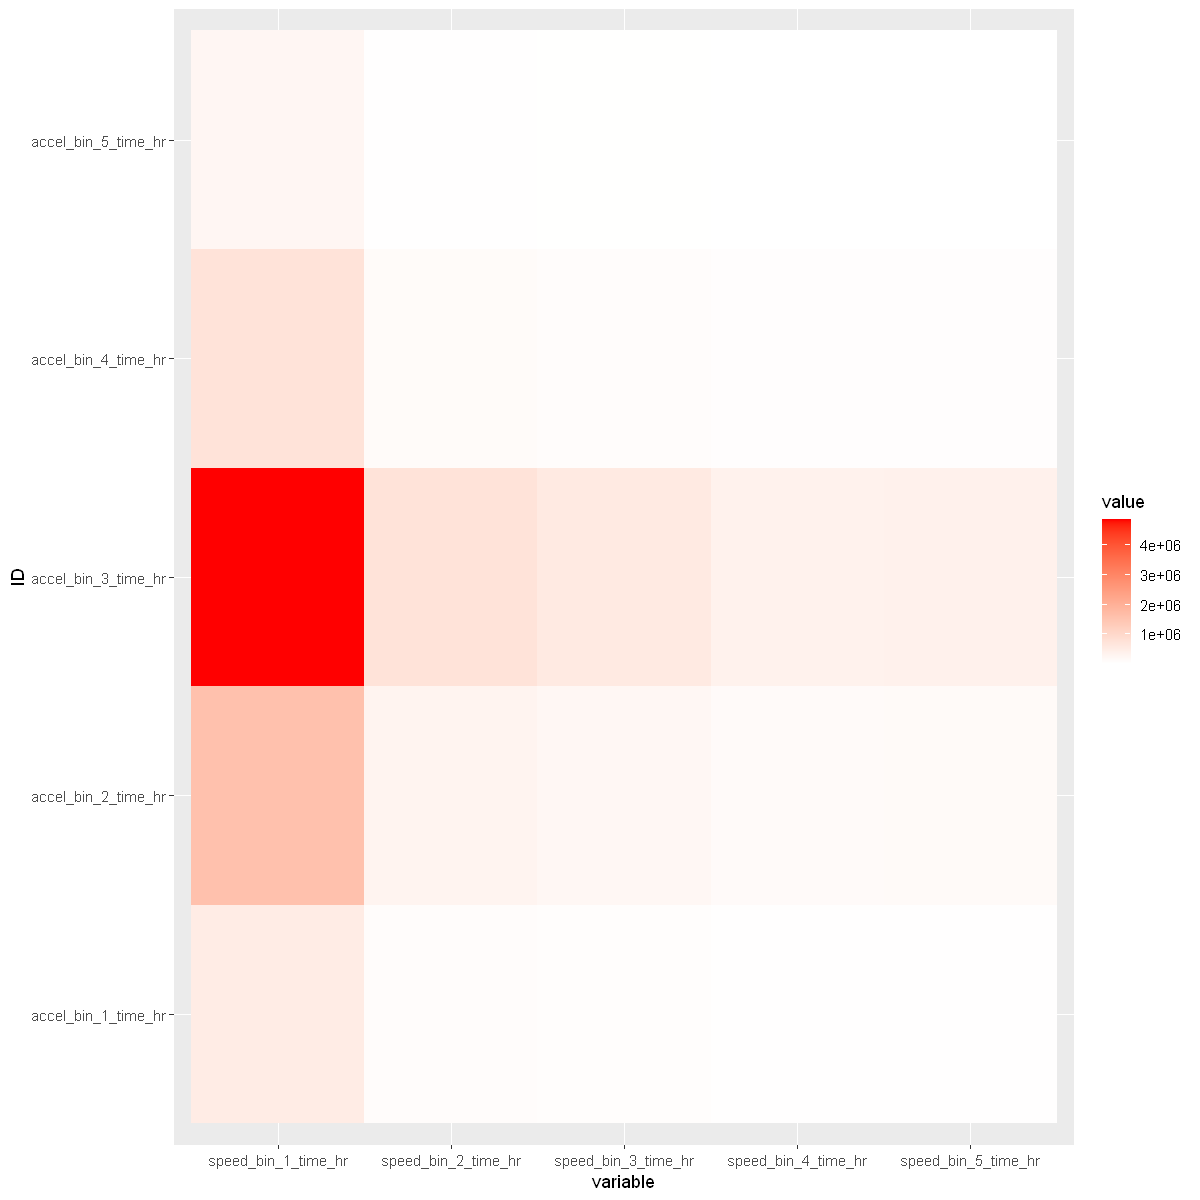

In [15]:
# heat map
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(data_m, aes(x=variable,y=ID)) + geom_tile(aes(fill=value)) +
scale_fill_gradient(low = "white", high = "red")

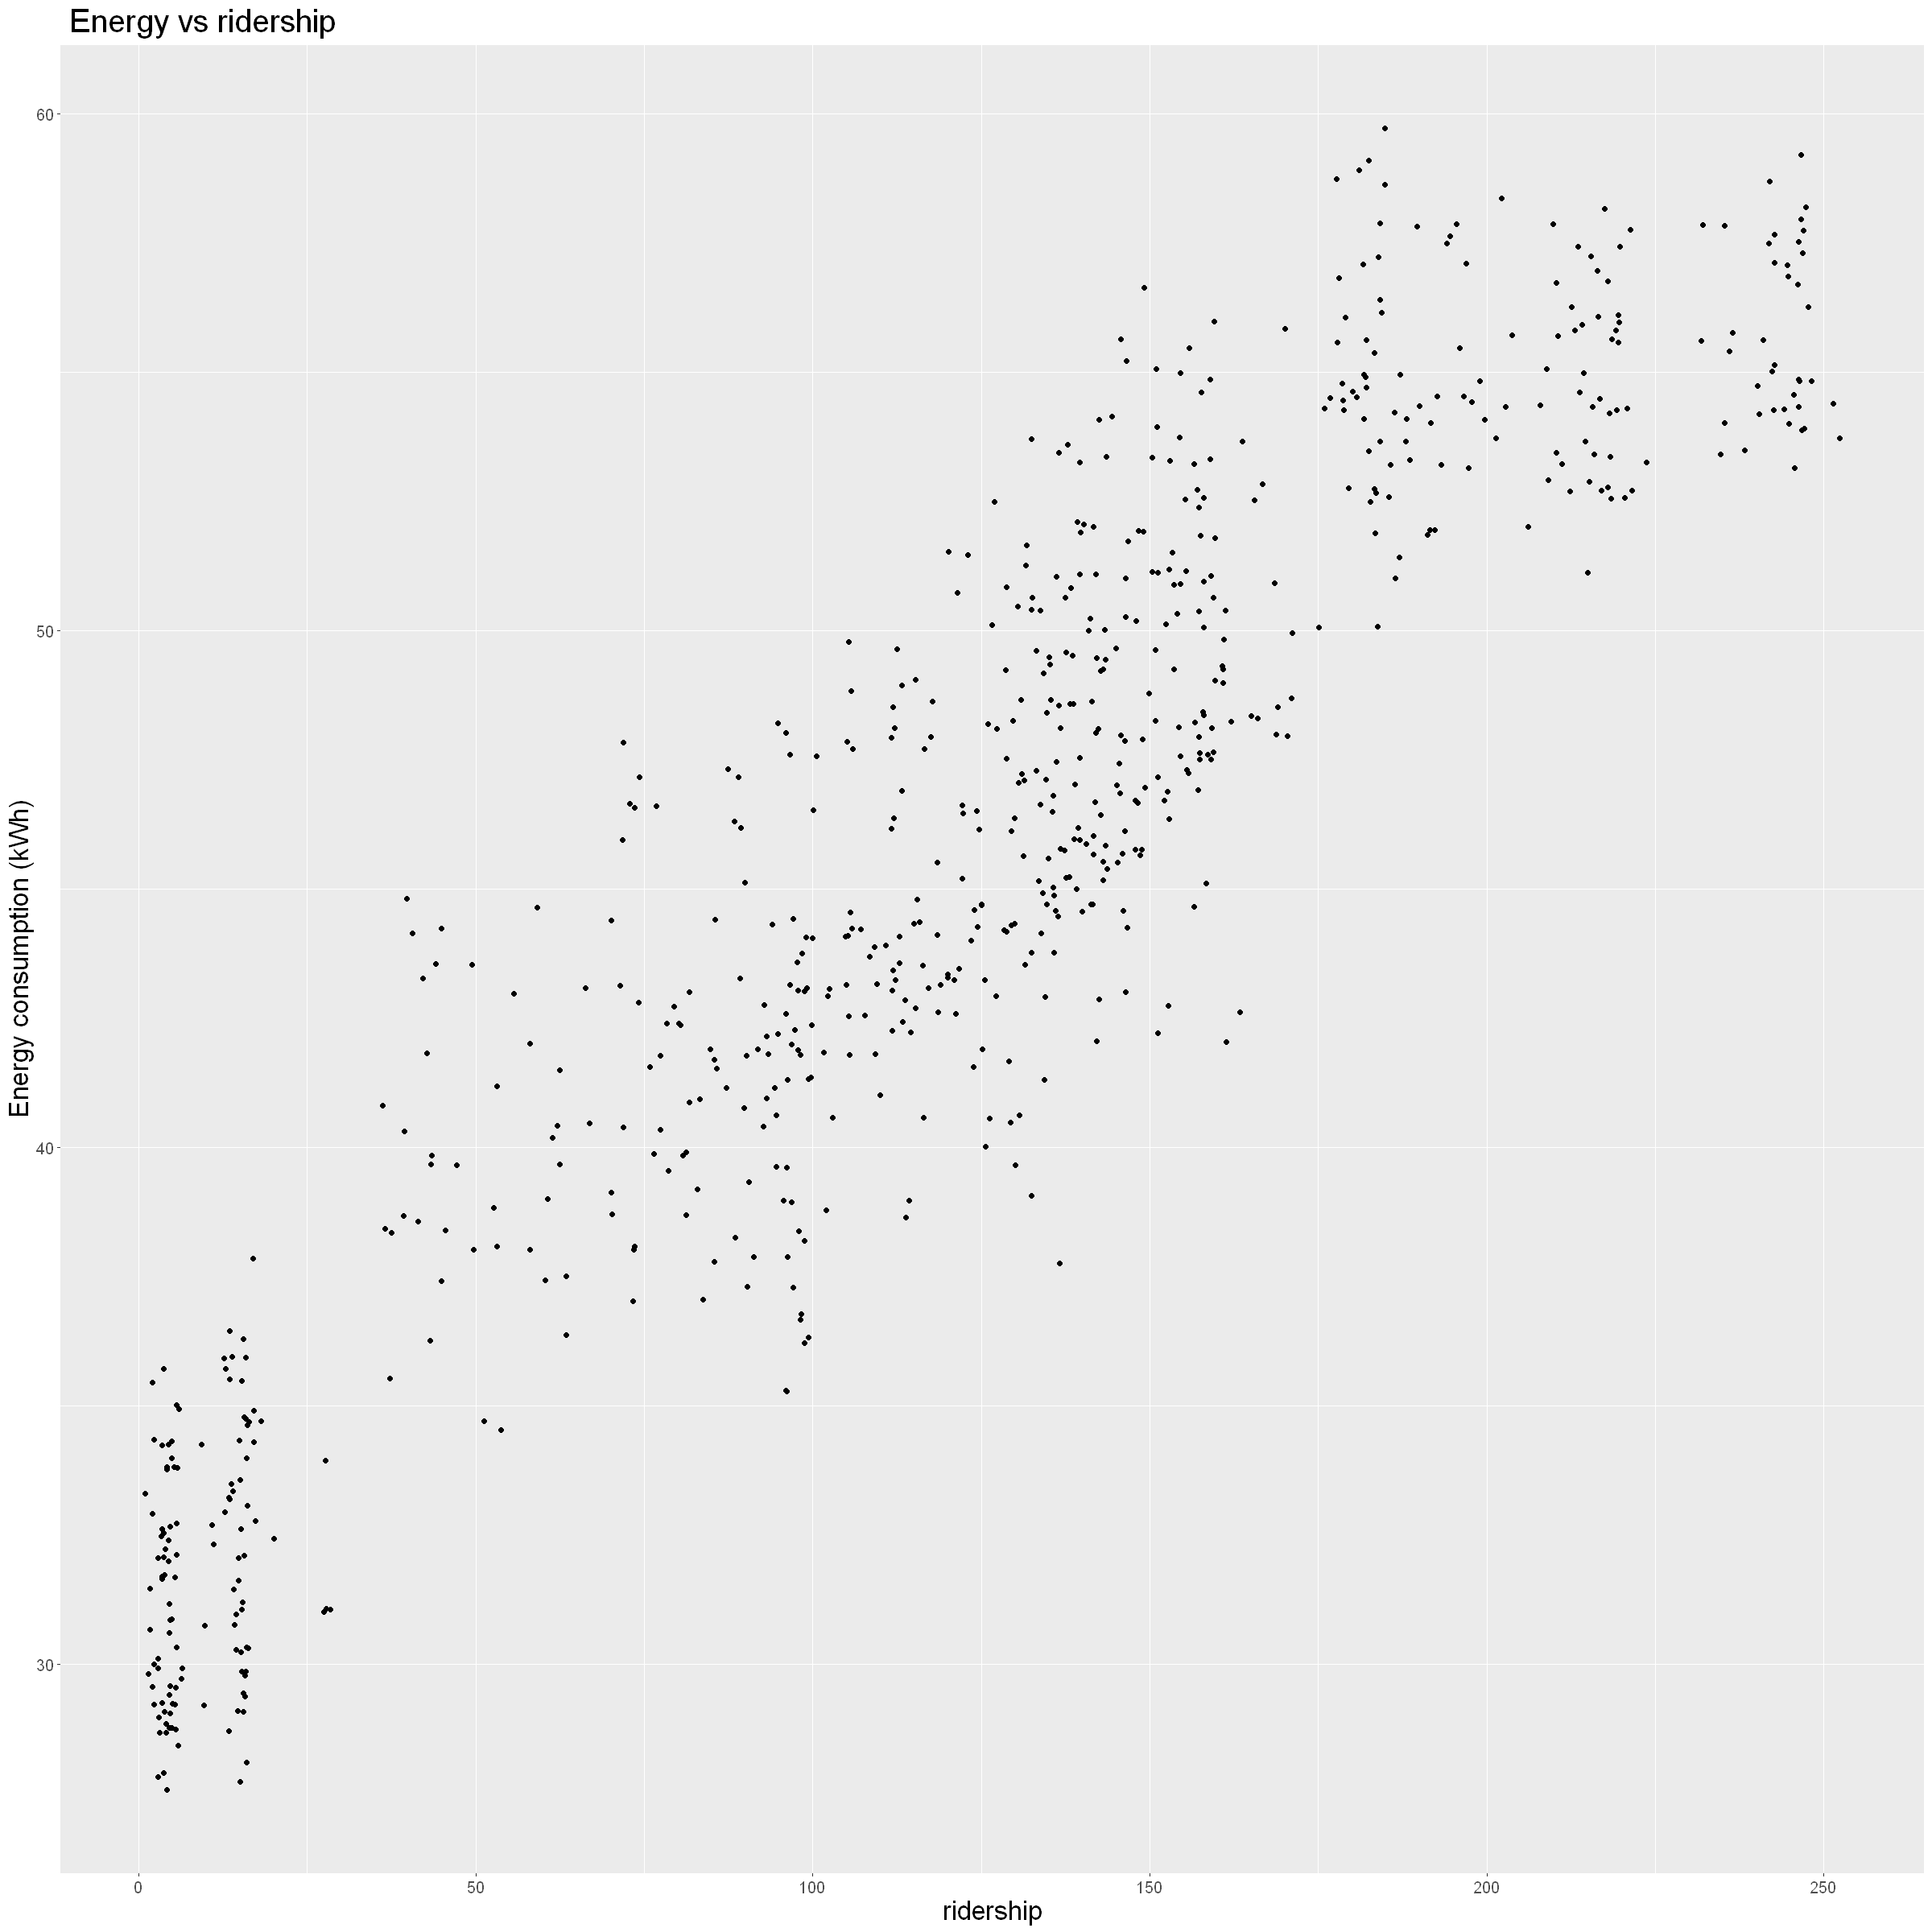

In [28]:
# Energy vs ridership plot
ggplot(df) + 
 geom_point(aes(x=sqrt(ridership), y=energy_kwh)) +
 theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
 labs(title =" Energy vs ridership ", y = "Energy consumption (kWh)", x = "ridership")

# Bin variables box plot

In [16]:
df_melt= melt(df, id.vars=c("year",'month',"day","hour",
                            "speed_bin_1_time_hr","speed_bin_2_time_hr","speed_bin_3_time_hr",
                            "speed_bin_4_time_hr","speed_bin_5_time_hr"),
              measure.vars = c("accel_bin_1_time_hr","accel_bin_2_time_hr",
                               "accel_bin_3_time_hr","accel_bin_4_time_hr","accel_bin_5_time_hr"))
head(df_melt)

Warning message in melt(df, id.vars = c("year", "month", "day", "hour", "speed_bin_1_time_hr", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(df). In the next version, this warning will become an error."


,year,month,day,hour,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,speed_bin_4_time_hr,speed_bin_5_time_hr,variable,value
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,2019,4,1,10,63.17194,21.10694,15.07417,8.828889,9.320833,accel_bin_1_time_hr,10.266667
2,2019,4,1,11,55.72083,19.12222,14.50750,7.564444,7.583333,accel_bin_1_time_hr,9.173611
3,2019,4,1,12,58.56194,19.76028,12.88806,7.459722,7.944722,accel_bin_1_time_hr,9.123611
4,2019,4,1,13,61.61694,16.85667,12.75944,7.780556,7.491667,accel_bin_1_time_hr,8.662222
5,2019,4,1,14,91.71944,19.22333,13.67806,8.013611,9.142500,accel_bin_1_time_hr,9.809722
6,2019,4,1,15,84.90639,20.30056,14.82972,10.373889,11.024722,accel_bin_1_time_hr,10.502778


In [ ]:
head(df_melt)

Warning message:
"Removed 175 rows containing non-finite values (stat_boxplot)."


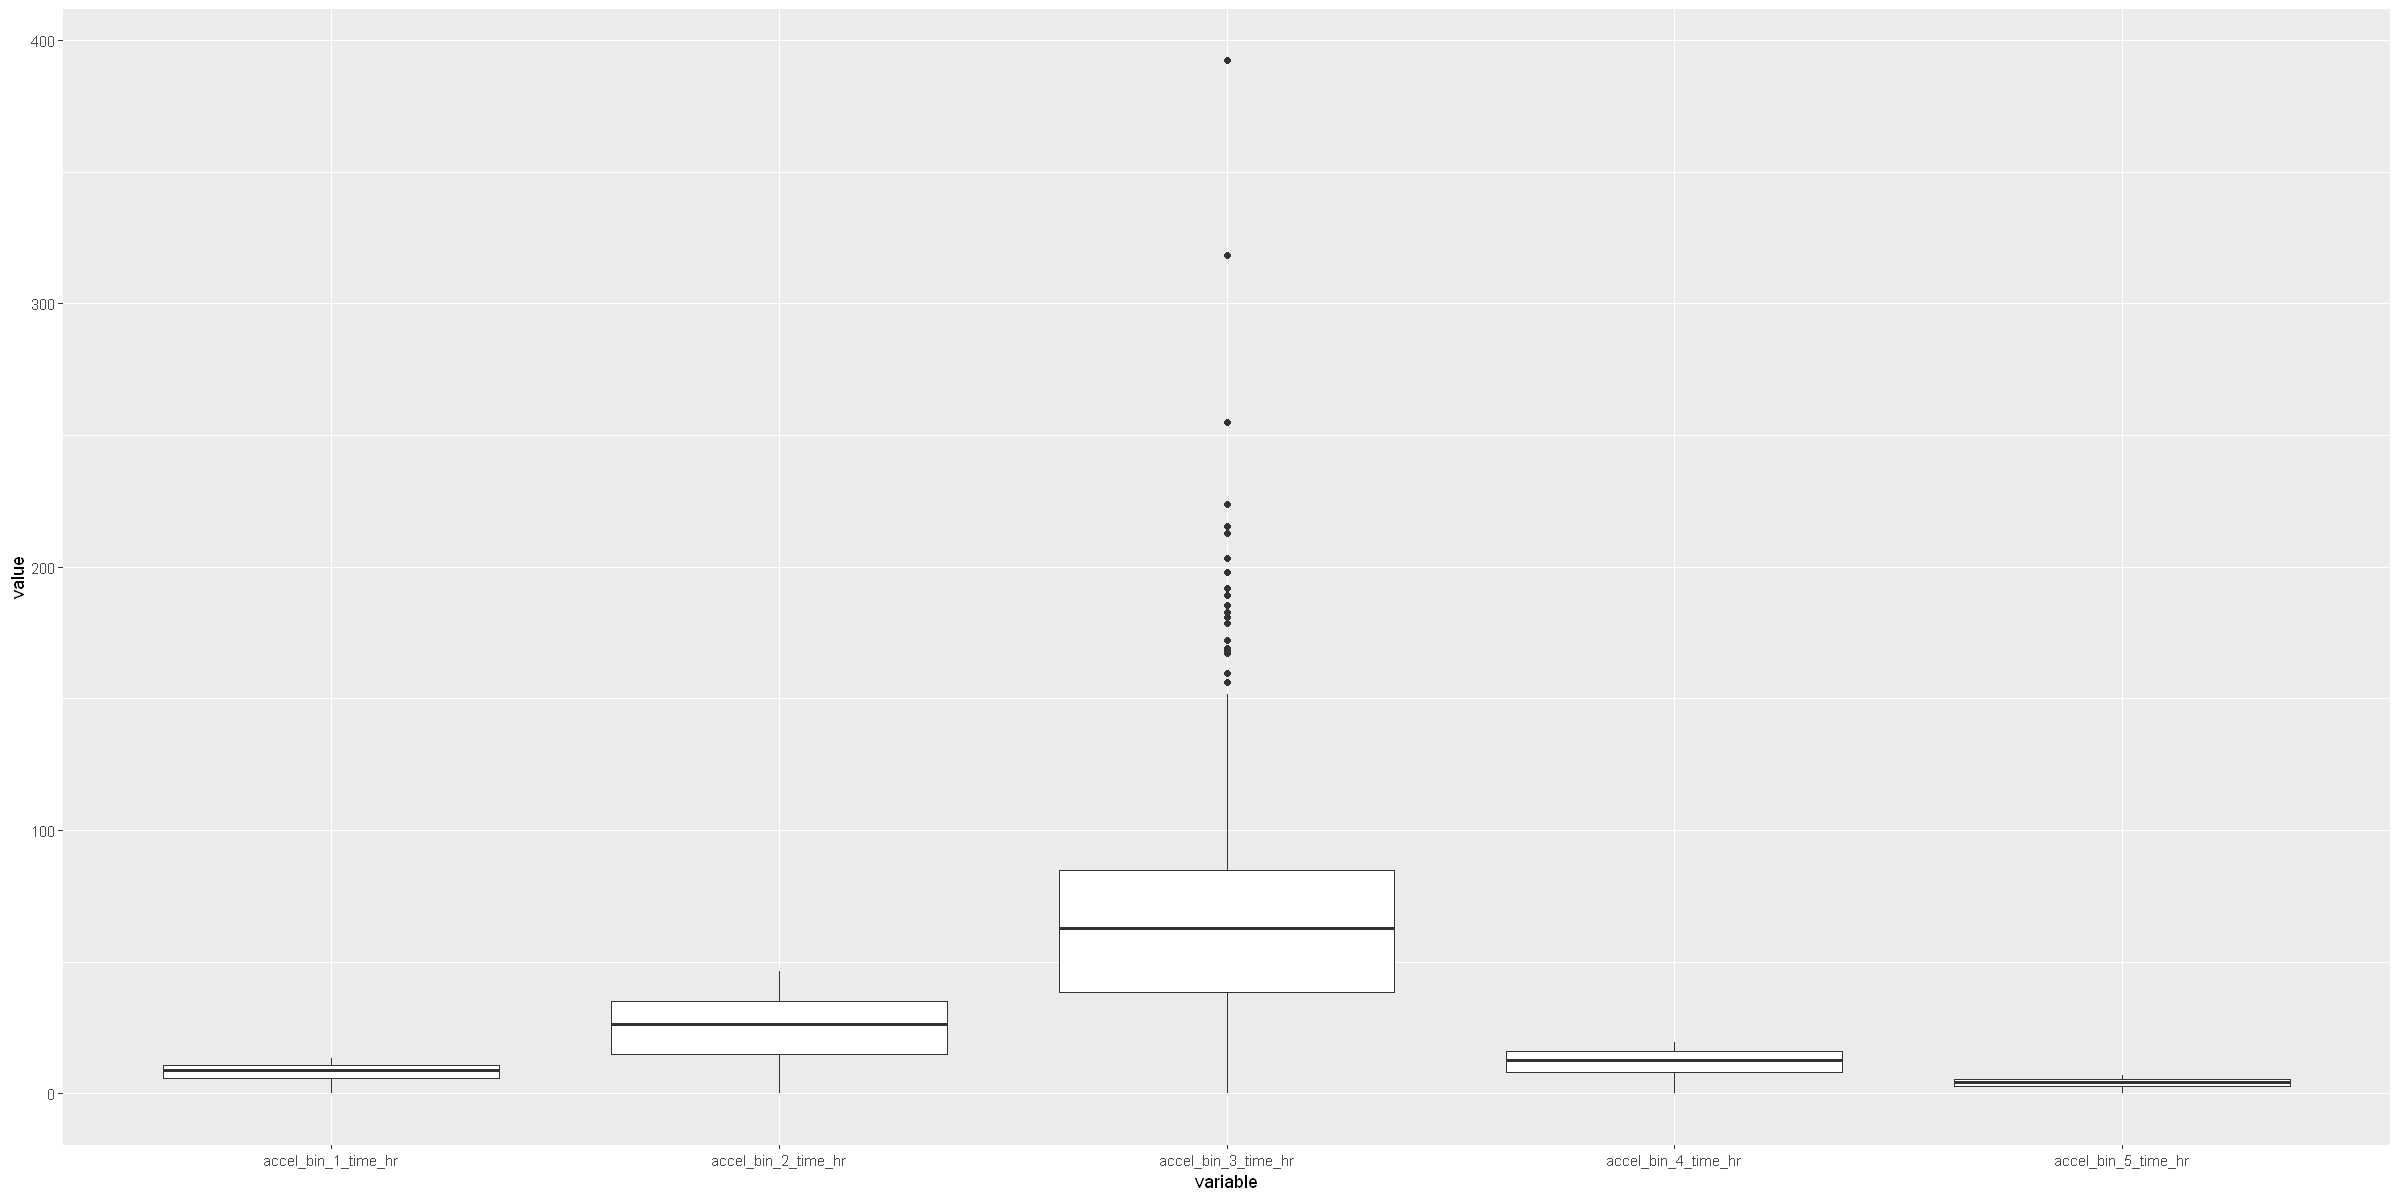

In [38]:
#box plot for speed bin 1
ggplot(df_melt,aes(x=variable,y=value))+
  geom_boxplot()#+ylim(c(0,500))

Warning message in melt(dfh_train, id.vars = c("speed_bin_2_time_hr"), measure.vars = c("accel_bin_1_time_hr", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(dfh_train). In the next version, this warning will become an error."


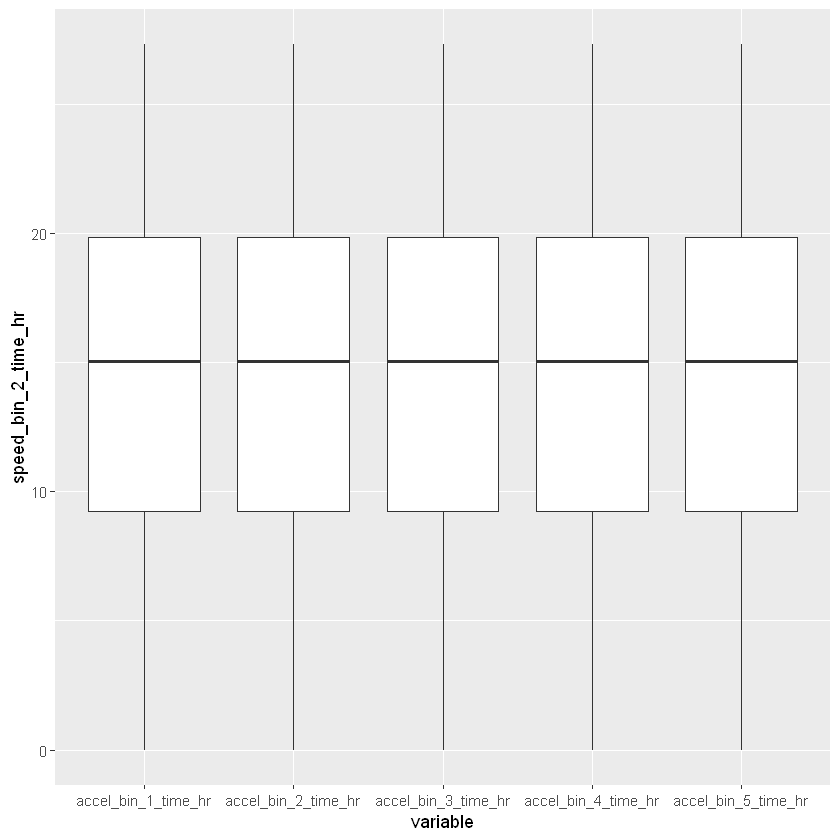

In [62]:
df_train_melt = melt(dfh_train, id.vars=c('speed_bin_2_time_hr'),measure.vars = c("accel_bin_1_time_hr","accel_bin_2_time_hr","accel_bin_3_time_hr","accel_bin_4_time_hr","accel_bin_5_time_hr"))
ggplot(df_train_melt,aes(x=variable,y=speed_bin_2_time_hr,color=value))+
  geom_boxplot()#+ylim(c(0,500))

# linear regression

In [3]:
# Dummy variables transfer
df$weekends_weekday = as.factor(df$weekends_weekday)

In [4]:
#Split the hour data
set.seed(1234)
rate = 0.8
sub = sample(1:nrow(df),round(nrow(df)*rate))#the split ratio is 0.8
dfh_train = df[sub,]
dfh_test = df[-sub,]

In [41]:
# linear regression
modelFit_hour_linear= lm(energy_kwh ~ ridership + avg_interval_speed_mph +
                         avg_hour_speed_mph +
                         # Speed bin
                         speed_bin_1_time_hr + speed_bin_2_time_hr + 
                         speed_bin_3_time_hr +
                         speed_bin_4_time_hr + speed_bin_5_time_hr +
                         # Acceleration bin
                         accel_bin_1_time_hr + accel_bin_2_time_hr + 
                         accel_bin_3_time_hr + accel_bin_4_time_hr + 
                         accel_bin_5_time_hr +
                         # Interaction term
                         speed_bin_1_time_hr* accel_bin_1_time_hr +
                         speed_bin_1_time_hr* accel_bin_2_time_hr + 
                         speed_bin_1_time_hr* accel_bin_3_time_hr +
                         speed_bin_1_time_hr* accel_bin_4_time_hr +
                         speed_bin_1_time_hr* accel_bin_5_time_hr +
                         speed_bin_2_time_hr* accel_bin_1_time_hr +
                         speed_bin_2_time_hr* accel_bin_2_time_hr + 
                         speed_bin_2_time_hr* accel_bin_3_time_hr +
                         speed_bin_2_time_hr* accel_bin_4_time_hr +
                         speed_bin_2_time_hr* accel_bin_5_time_hr +
                         speed_bin_3_time_hr* accel_bin_1_time_hr +
                         speed_bin_3_time_hr* accel_bin_2_time_hr + 
                         speed_bin_3_time_hr* accel_bin_3_time_hr +
                         speed_bin_3_time_hr* accel_bin_4_time_hr +
                         speed_bin_3_time_hr* accel_bin_5_time_hr +
                         speed_bin_4_time_hr* accel_bin_1_time_hr +
                         speed_bin_4_time_hr* accel_bin_2_time_hr + 
                         speed_bin_4_time_hr* accel_bin_3_time_hr +
                         speed_bin_4_time_hr* accel_bin_4_time_hr +
                         speed_bin_4_time_hr* accel_bin_5_time_hr +
                         speed_bin_5_time_hr* accel_bin_1_time_hr +
                         speed_bin_5_time_hr* accel_bin_2_time_hr + 
                         speed_bin_5_time_hr* accel_bin_3_time_hr +
                         speed_bin_5_time_hr* accel_bin_4_time_hr +
                         speed_bin_5_time_hr* accel_bin_5_time_hr +
                         TAVG,data = dfh_train) #select=TRUE weekends_weekday)

In [15]:
linear_result = summary(modelFit_hour_linear)

In [21]:
# Check the coefficient of linear regression model
linear_coe = linear_result$coefficients
linear_coe = data.frame(linear_coe)
linear_coe$variables_name = rownames(linear_coe)

Warning message:
"Removed 1 rows containing missing values (geom_point)."


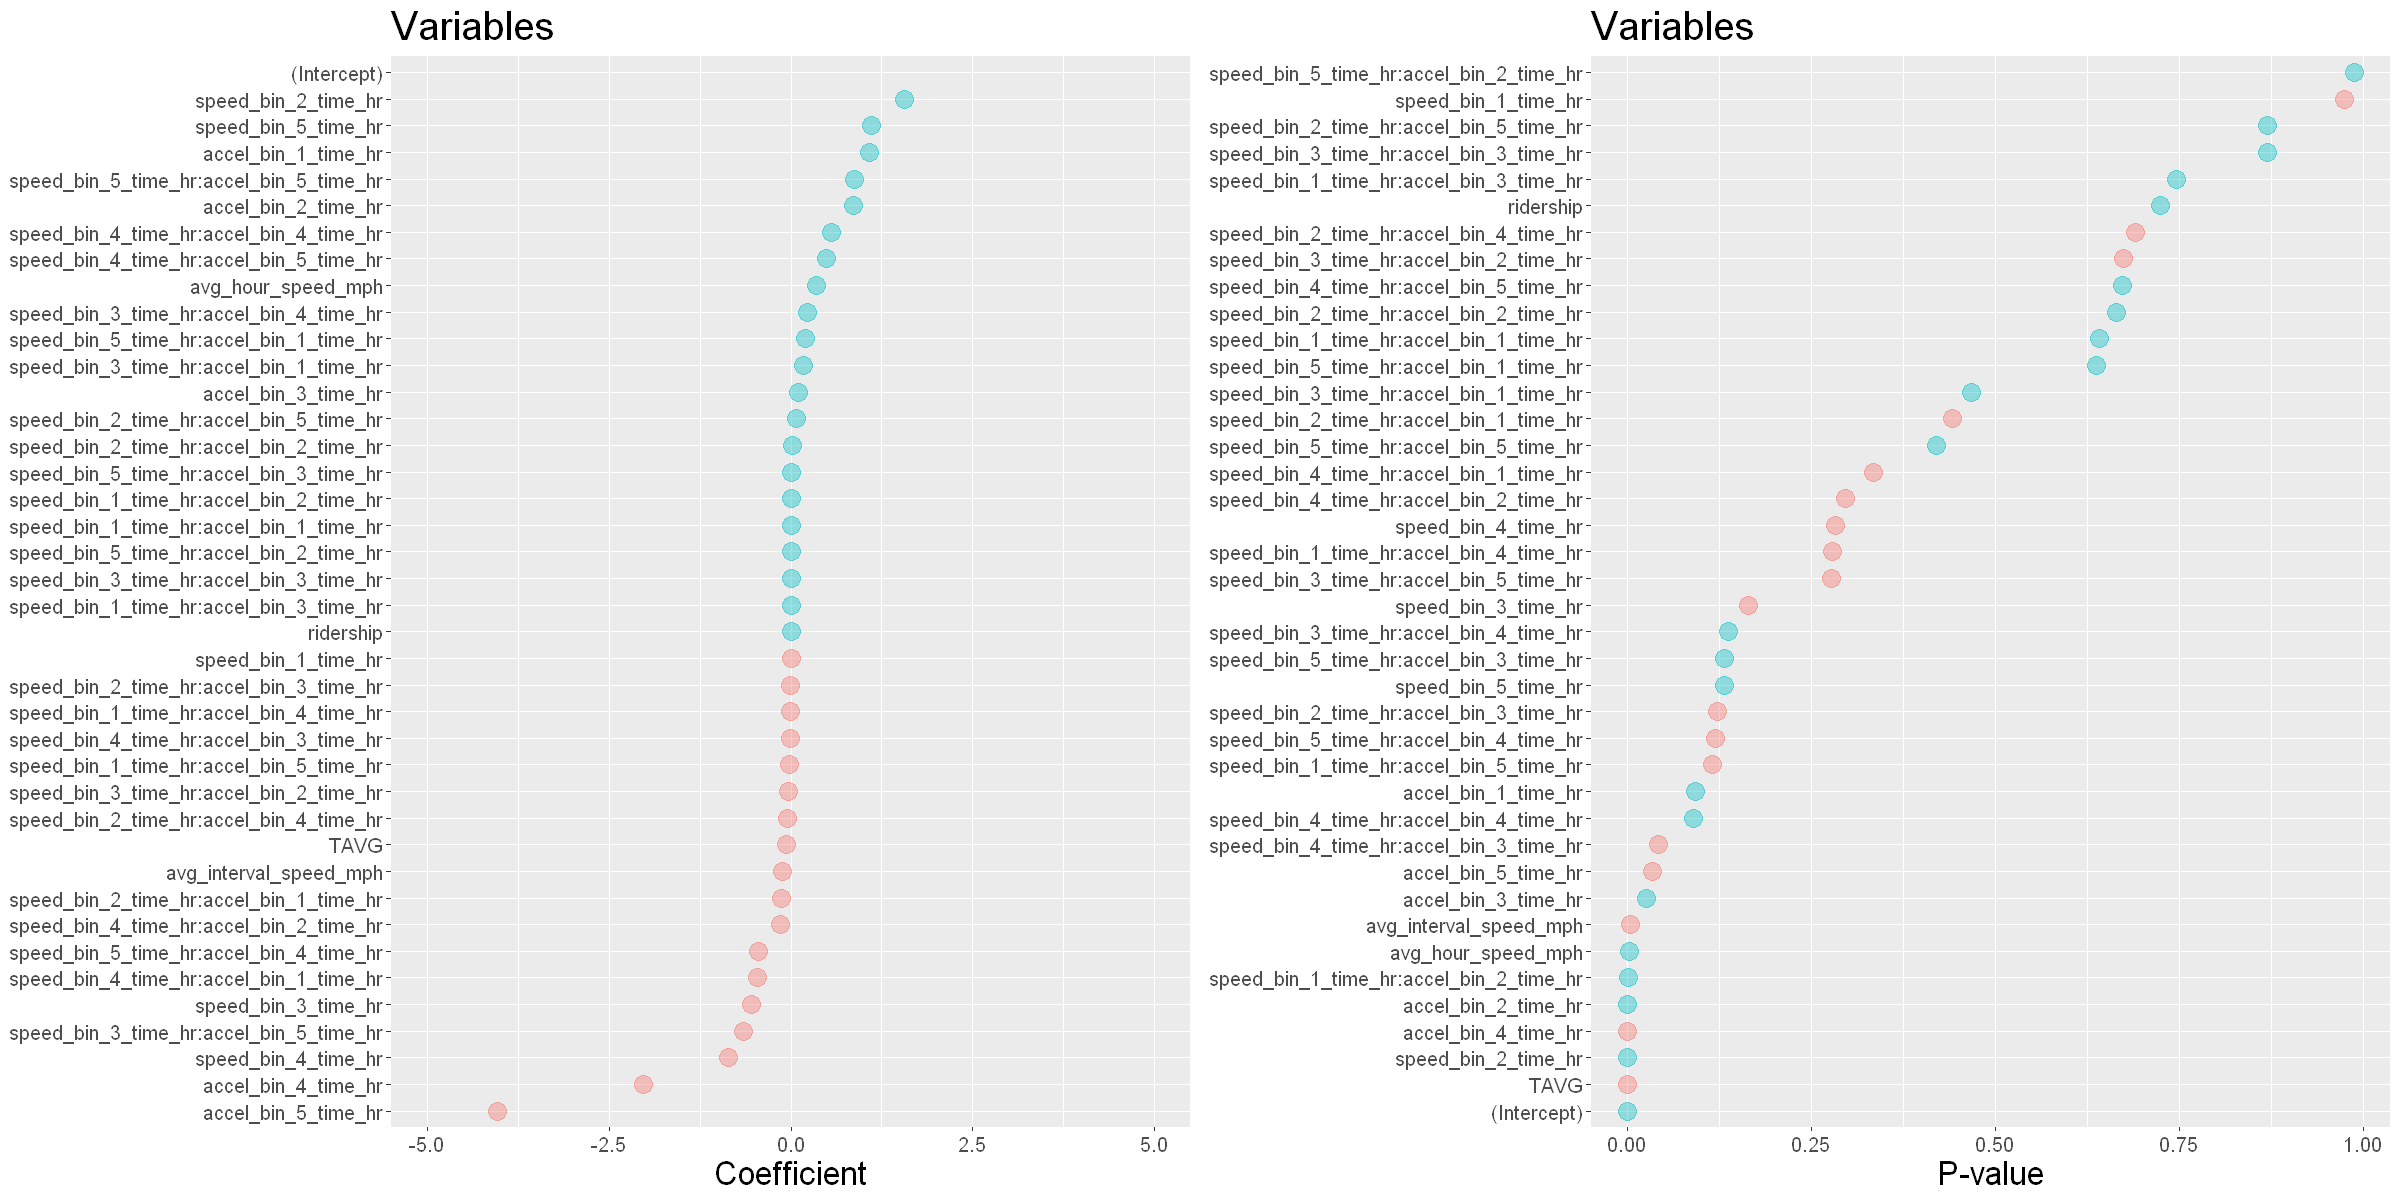

In [34]:
# Plot linear regression coef
p1 = ggplot(linear_coe,aes(Estimate, reorder(variables_name,Estimate), color = Estimate > 0)) +
  xlim(-5,5) +
  geom_point(show.legend = FALSE,size = 5,alpha = 0.4) +
  theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
  ggtitle("Variables") +
  xlab("Coefficient") +
  ylab(NULL)
p2 = ggplot(linear_coe,aes(Pr...t.., reorder(variables_name,Pr...t..), color = Estimate > 0)) +
  geom_point(show.legend = FALSE,size = 5,alpha = 0.4) +
  theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
  ggtitle("Variables") +
  xlab("P-value") +
  ylab(NULL)
options(repr.plot.width = 20, repr.plot.height = 10)
grid.arrange(p1, p2,ncol=2, nrow=1)

In [42]:
# Linear model prediction
pred_linear <- predict.lm(modelFit_hour_linear, dfh_test)

In [46]:
# Put prediction and obervation into one table
test_compare = data.frame("Observed Response" = dfh_test$energy_kwh, " Linear_model" = pred_linear,
                          "Hour" = dfh_test$hour,"Year" = dfh_test$year,"Day"  = dfh_test$day,"Month" = dfh_test$month)
test_compare$Date = as.Date(ISOdate(test_compare$Year, test_compare$Month, test_compare$Day,test_compare$Hour))
test_compare_plot_linear = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("X.Linear_model","Observed.Response"),variable.name = "type",value.name = "x")

Warning message in melt(test_compare, id.vars = c("Hour", "Year", "Day", "Month", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(test_compare). In the next version, this warning will become an error."


Warning message:
"Removed 1 row(s) containing missing values (geom_path)."


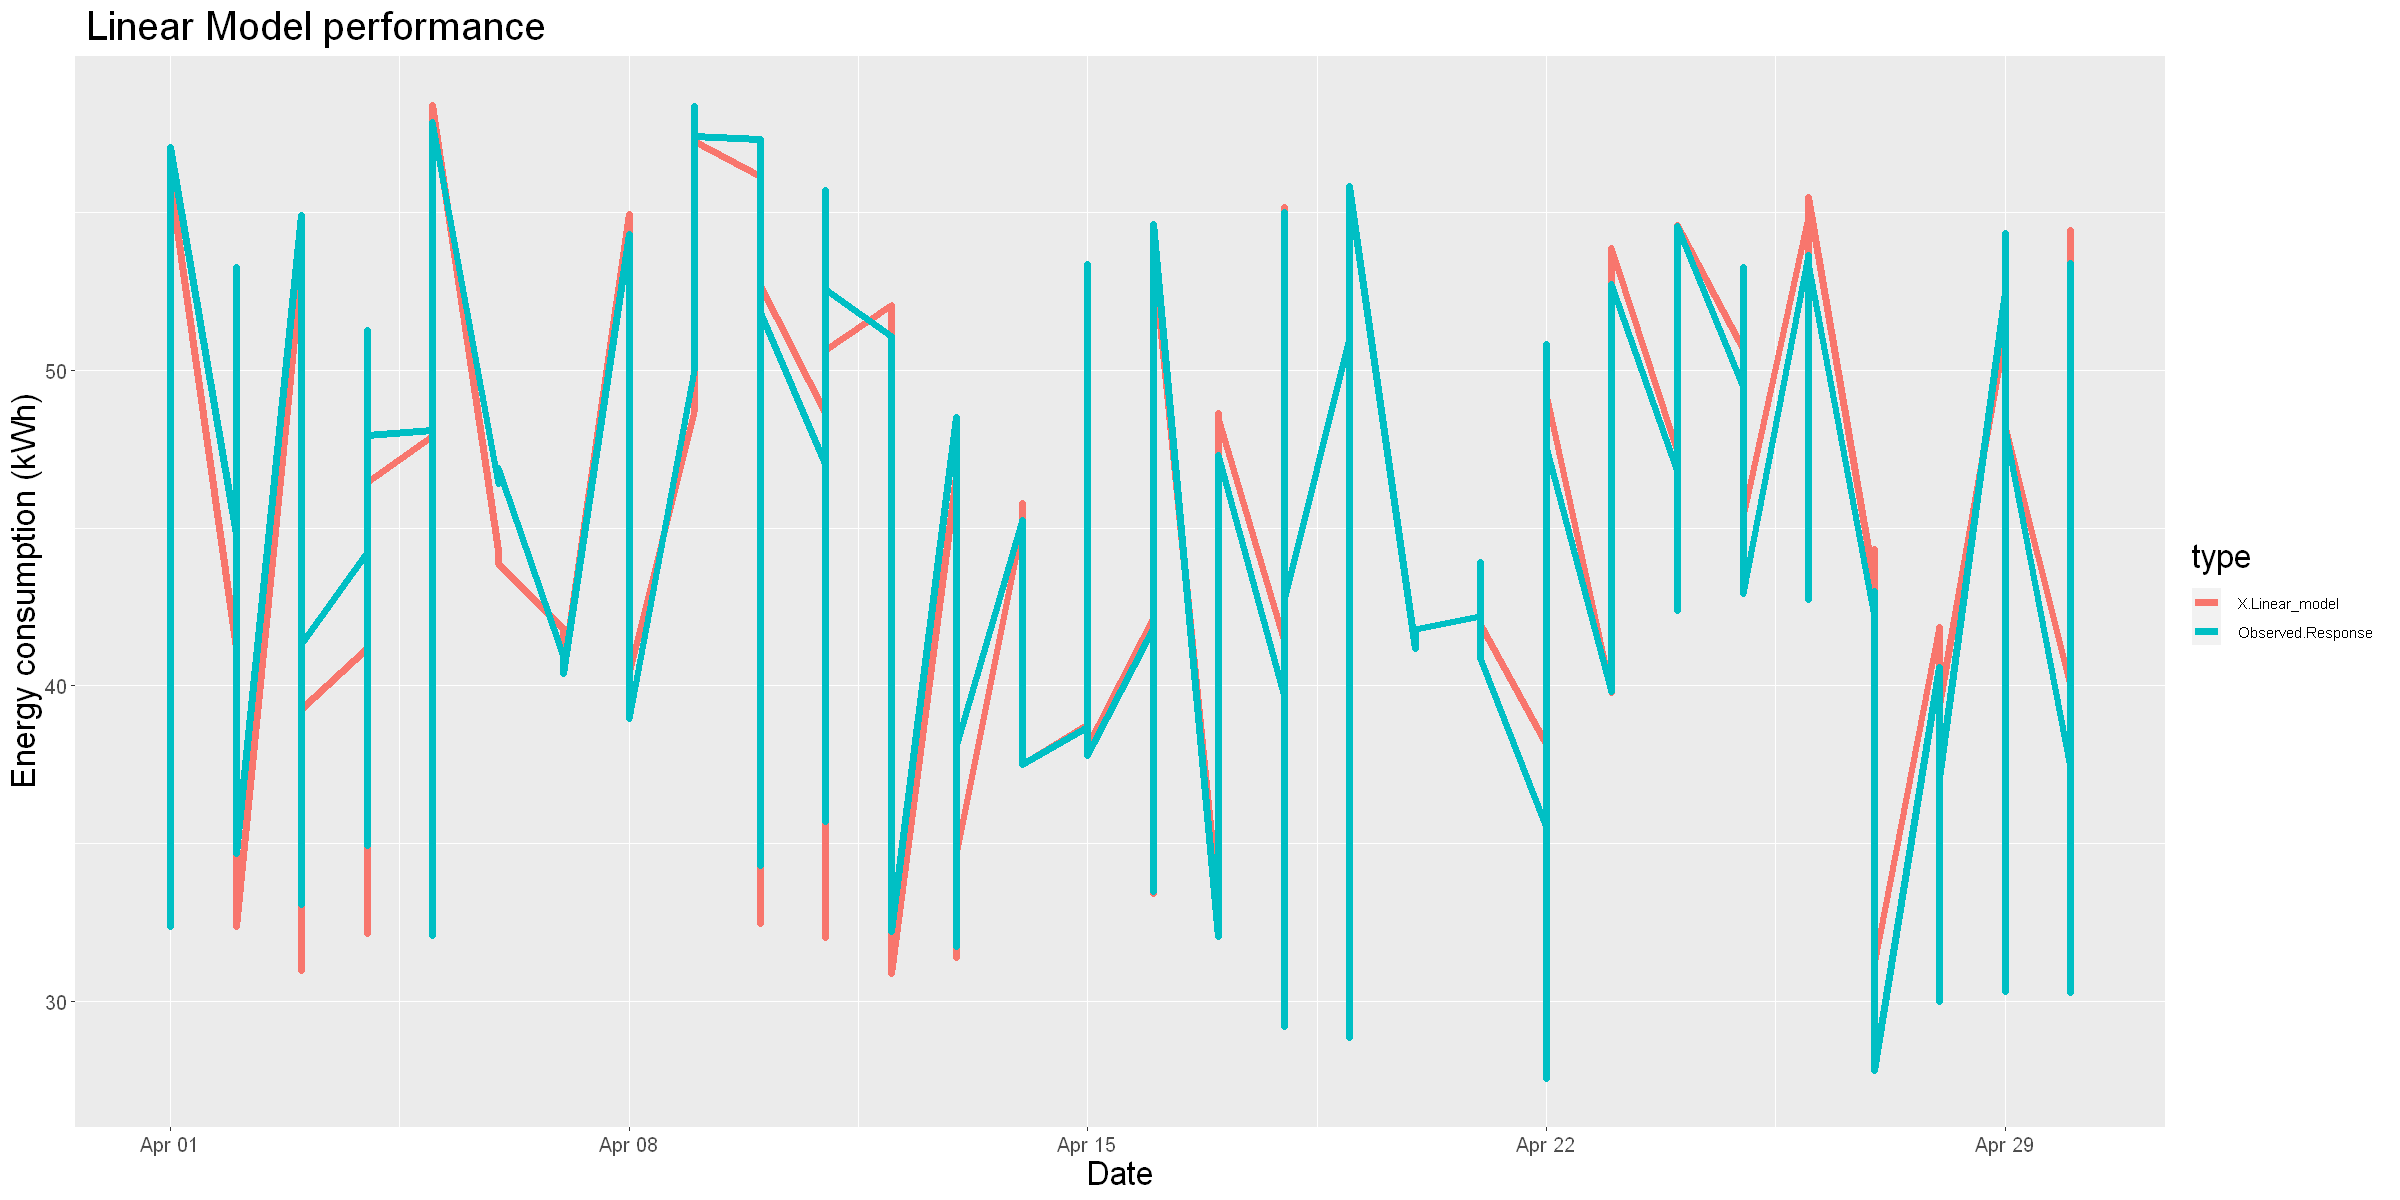

In [55]:
# png("../../figures/Linear-model-April-2019.png",height=4000,width=5000,res=360)
ggplot(test_compare_plot_linear) + 
 geom_line(aes(x = Date, y = x,color =type,),size = 2,alpha = 1,) +
theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
 labs(title =" Linear Model performance ", y = "Energy consumption (kWh)", x = "Date")
# dev.off()

In [57]:
head(dfh_test)

,X,year,month,day,hour,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,...,accel_bin_2_time_hr,accel_bin_3_time_hr,accel_bin_4_time_hr,accel_bin_5_time_hr,avg_interval_speed_mph,avg_hour_speed_mph,ridership,weekends_weekday,TAVG,energy_kwh
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
5,5,2019,4,1,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,171.7,2,42,35.110
6,6,2019,4,1,10,1157.9279,117.5028,63.17194,21.10694,15.07417,...,33.21694,52.21750,15.46083,5.102500,19.38688,9.854472,19134.9,2,42,53.894
8,8,2019,4,1,12,987.7224,106.6147,58.56194,19.76028,12.88806,...,28.26639,50.29861,13.49528,4.503333,18.57697,9.264409,17870.3,2,42,48.963
9,9,2019,4,1,13,947.9956,106.5056,61.61694,16.85667,12.75944,...,27.08194,52.34806,13.50861,4.230000,18.60897,8.900903,18464.4,2,42,49.200
16,16,2019,4,1,2,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,20.0,2,42,32.387
24,24,2019,4,1,6,1105.2244,106.5978,56.29750,17.13167,14.38444,...,28.48528,41.57083,14.80361,4.720556,19.69621,10.368175,23835.3,2,42,53.737


# variable preparation

In [5]:
dfh_test = dfh_test[,-21]
dfh_test = na.omit(dfh_test)
dfh_test$speed_bin_1_time_hr_accel_bin_1_time_hr = dfh_test$speed_bin_1_time_hr* dfh_test$accel_bin_1_time_hr
dfh_test$speed_bin_1_time_hr_accel_bin_2_time_hr = dfh_test$speed_bin_1_time_hr* dfh_test$accel_bin_2_time_hr
dfh_test$speed_bin_1_time_hr_accel_bin_3_time_hr = dfh_test$speed_bin_1_time_hr* dfh_test$accel_bin_3_time_hr
dfh_test$speed_bin_1_time_hr_accel_bin_4_time_hr = dfh_test$speed_bin_1_time_hr* dfh_test$accel_bin_4_time_hr
dfh_test$speed_bin_1_time_hr_accel_bin_5_time_hr = dfh_test$speed_bin_1_time_hr* dfh_test$accel_bin_5_time_hr
dfh_test$speed_bin_2_time_hr_accel_bin_1_time_hr = dfh_test$speed_bin_2_time_hr* dfh_test$accel_bin_1_time_hr
dfh_test$speed_bin_2_time_hr_accel_bin_2_time_hr = dfh_test$speed_bin_2_time_hr* dfh_test$accel_bin_2_time_hr
dfh_test$speed_bin_2_time_hr_accel_bin_3_time_hr = dfh_test$speed_bin_2_time_hr* dfh_test$accel_bin_3_time_hr
dfh_test$speed_bin_2_time_hr_accel_bin_4_time_hr = dfh_test$speed_bin_2_time_hr* dfh_test$accel_bin_4_time_hr
dfh_test$speed_bin_2_time_hr_accel_bin_5_time_hr = dfh_test$speed_bin_2_time_hr* dfh_test$accel_bin_5_time_hr
dfh_test$speed_bin_3_time_hr_accel_bin_1_time_hr = dfh_test$speed_bin_3_time_hr* dfh_test$accel_bin_1_time_hr
dfh_test$speed_bin_3_time_hr_accel_bin_2_time_hr = dfh_test$speed_bin_3_time_hr* dfh_test$accel_bin_2_time_hr
dfh_test$speed_bin_3_time_hr_accel_bin_3_time_hr = dfh_test$speed_bin_3_time_hr* dfh_test$accel_bin_3_time_hr
dfh_test$speed_bin_3_time_hr_accel_bin_4_time_hr = dfh_test$speed_bin_3_time_hr* dfh_test$accel_bin_4_time_hr
dfh_test$speed_bin_3_time_hr_accel_bin_5_time_hr = dfh_test$speed_bin_3_time_hr* dfh_test$accel_bin_5_time_hr
dfh_test$speed_bin_4_time_hr_accel_bin_1_time_hr = dfh_test$speed_bin_4_time_hr* dfh_test$accel_bin_1_time_hr
dfh_test$speed_bin_4_time_hr_accel_bin_2_time_hr = dfh_test$speed_bin_4_time_hr* dfh_test$accel_bin_2_time_hr
dfh_test$speed_bin_4_time_hr_accel_bin_3_time_hr = dfh_test$speed_bin_4_time_hr* dfh_test$accel_bin_3_time_hr
dfh_test$speed_bin_4_time_hr_accel_bin_4_time_hr = dfh_test$speed_bin_4_time_hr* dfh_test$accel_bin_4_time_hr
dfh_test$speed_bin_4_time_hr_accel_bin_5_time_hr = dfh_test$speed_bin_5_time_hr* dfh_test$accel_bin_5_time_hr
dfh_test$speed_bin_5_time_hr_accel_bin_1_time_hr = dfh_test$speed_bin_5_time_hr* dfh_test$accel_bin_1_time_hr
dfh_test$speed_bin_5_time_hr_accel_bin_2_time_hr = dfh_test$speed_bin_5_time_hr* dfh_test$accel_bin_2_time_hr
dfh_test$speed_bin_5_time_hr_accel_bin_3_time_hr = dfh_test$speed_bin_5_time_hr* dfh_test$accel_bin_3_time_hr
dfh_test$speed_bin_5_time_hr_accel_bin_4_time_hr = dfh_test$speed_bin_5_time_hr* dfh_test$accel_bin_4_time_hr
dfh_test$speed_bin_5_time_hr_accel_bin_5_time_hr = dfh_test$speed_bin_5_time_hr* dfh_test$accel_bin_5_time_hr

In [6]:
dfh_train = dfh_train[,-21]
dfh_train = na.omit(dfh_train)
dfh_train$speed_bin_1_time_hr_accel_bin_1_time_hr = dfh_train$speed_bin_1_time_hr* dfh_train$accel_bin_1_time_hr
dfh_train$speed_bin_1_time_hr_accel_bin_2_time_hr = dfh_train$speed_bin_1_time_hr* dfh_train$accel_bin_2_time_hr
dfh_train$speed_bin_1_time_hr_accel_bin_3_time_hr = dfh_train$speed_bin_1_time_hr* dfh_train$accel_bin_3_time_hr
dfh_train$speed_bin_1_time_hr_accel_bin_4_time_hr = dfh_train$speed_bin_1_time_hr* dfh_train$accel_bin_4_time_hr
dfh_train$speed_bin_1_time_hr_accel_bin_5_time_hr = dfh_train$speed_bin_1_time_hr* dfh_train$accel_bin_5_time_hr
dfh_train$speed_bin_2_time_hr_accel_bin_1_time_hr = dfh_train$speed_bin_2_time_hr* dfh_train$accel_bin_1_time_hr
dfh_train$speed_bin_2_time_hr_accel_bin_2_time_hr = dfh_train$speed_bin_2_time_hr* dfh_train$accel_bin_2_time_hr
dfh_train$speed_bin_2_time_hr_accel_bin_3_time_hr = dfh_train$speed_bin_2_time_hr* dfh_train$accel_bin_3_time_hr
dfh_train$speed_bin_2_time_hr_accel_bin_4_time_hr = dfh_train$speed_bin_2_time_hr* dfh_train$accel_bin_4_time_hr
dfh_train$speed_bin_2_time_hr_accel_bin_5_time_hr = dfh_train$speed_bin_2_time_hr* dfh_train$accel_bin_5_time_hr
dfh_train$speed_bin_3_time_hr_accel_bin_1_time_hr = dfh_train$speed_bin_3_time_hr* dfh_train$accel_bin_1_time_hr
dfh_train$speed_bin_3_time_hr_accel_bin_2_time_hr = dfh_train$speed_bin_3_time_hr* dfh_train$accel_bin_2_time_hr
dfh_train$speed_bin_3_time_hr_accel_bin_3_time_hr = dfh_train$speed_bin_3_time_hr* dfh_train$accel_bin_3_time_hr
dfh_train$speed_bin_3_time_hr_accel_bin_4_time_hr = dfh_train$speed_bin_3_time_hr* dfh_train$accel_bin_4_time_hr
dfh_train$speed_bin_3_time_hr_accel_bin_5_time_hr = dfh_train$speed_bin_3_time_hr* dfh_train$accel_bin_5_time_hr
dfh_train$speed_bin_4_time_hr_accel_bin_1_time_hr = dfh_train$speed_bin_4_time_hr* dfh_train$accel_bin_1_time_hr
dfh_train$speed_bin_4_time_hr_accel_bin_2_time_hr = dfh_train$speed_bin_4_time_hr* dfh_train$accel_bin_2_time_hr
dfh_train$speed_bin_4_time_hr_accel_bin_3_time_hr = dfh_train$speed_bin_4_time_hr* dfh_train$accel_bin_3_time_hr
dfh_train$speed_bin_4_time_hr_accel_bin_4_time_hr = dfh_train$speed_bin_4_time_hr* dfh_train$accel_bin_4_time_hr
dfh_train$speed_bin_4_time_hr_accel_bin_5_time_hr = dfh_train$speed_bin_5_time_hr* dfh_train$accel_bin_5_time_hr
dfh_train$speed_bin_5_time_hr_accel_bin_1_time_hr = dfh_train$speed_bin_5_time_hr* dfh_train$accel_bin_1_time_hr
dfh_train$speed_bin_5_time_hr_accel_bin_2_time_hr = dfh_train$speed_bin_5_time_hr* dfh_train$accel_bin_2_time_hr
dfh_train$speed_bin_5_time_hr_accel_bin_3_time_hr = dfh_train$speed_bin_5_time_hr* dfh_train$accel_bin_3_time_hr
dfh_train$speed_bin_5_time_hr_accel_bin_4_time_hr = dfh_train$speed_bin_5_time_hr* dfh_train$accel_bin_4_time_hr
dfh_train$speed_bin_5_time_hr_accel_bin_5_time_hr = dfh_train$speed_bin_5_time_hr* dfh_train$accel_bin_5_time_hr

In [8]:
x = as.matrix(dfh_train[, -(1:5)])
x = as.matrix(dfh_train[, -22])
y = as.matrix(dfh_train[,"energy_kwh"])

# ridge regression

In [21]:
head(dfh_train)

,X,year,month,day,hour,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,...,speed_bin_4_time_hr_accel_bin_1_time_hr,speed_bin_4_time_hr_accel_bin_2_time_hr,speed_bin_4_time_hr_accel_bin_3_time_hr,speed_bin_4_time_hr_accel_bin_4_time_hr,speed_bin_4_time_hr_accel_bin_5_time_hr,speed_bin_5_time_hr_accel_bin_1_time_hr,speed_bin_5_time_hr_accel_bin_2_time_hr,speed_bin_5_time_hr_accel_bin_3_time_hr,speed_bin_5_time_hr_accel_bin_4_time_hr,speed_bin_5_time_hr_accel_bin_5_time_hr
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
289,289,2019,4,2,7,1358.18147,157.16583,95.56833,22.818333,16.714722,...,128.300012,440.9888543,704.771633,204.1863164,67.4577519,129.935422,446.6100346,713.75519,206.7890309,67.4577519
106,106,2019,4,13,14,883.56756,129.24944,89.60472,14.616389,10.305000,...,58.257556,192.3842748,490.093978,85.3378100,33.3531437,62.878669,207.6446021,528.96927,92.1069854,33.3531437
628,628,2019,4,6,0,638.91329,53.29472,24.91972,9.256667,7.527500,...,34.588669,72.7085836,93.037256,38.8464854,17.9760549,45.410691,95.4574746,122.14653,51.0006826,17.9760549
650,650,2019,4,6,8,587.35493,63.46194,35.27639,11.220000,7.620000,...,24.688271,78.9773833,125.638654,38.4728167,13.2625586,26.413746,84.4971512,134.41960,41.1617006,13.2625586
405,405,2019,4,24,3,94.84029,18.34389,14.35500,0.215000,1.984444,...,1.091183,0.2913139,8.133388,0.1240065,0.6396937,1.852453,0.4945505,13.80769,0.2105202,0.6396937
103,103,2019,4,13,11,889.58133,160.53694,121.02750,14.127500,10.122500,...,61.231372,202.9798042,731.328298,92.9085203,32.9203032,61.746317,204.6868266,737.47863,93.6898637,32.9203032


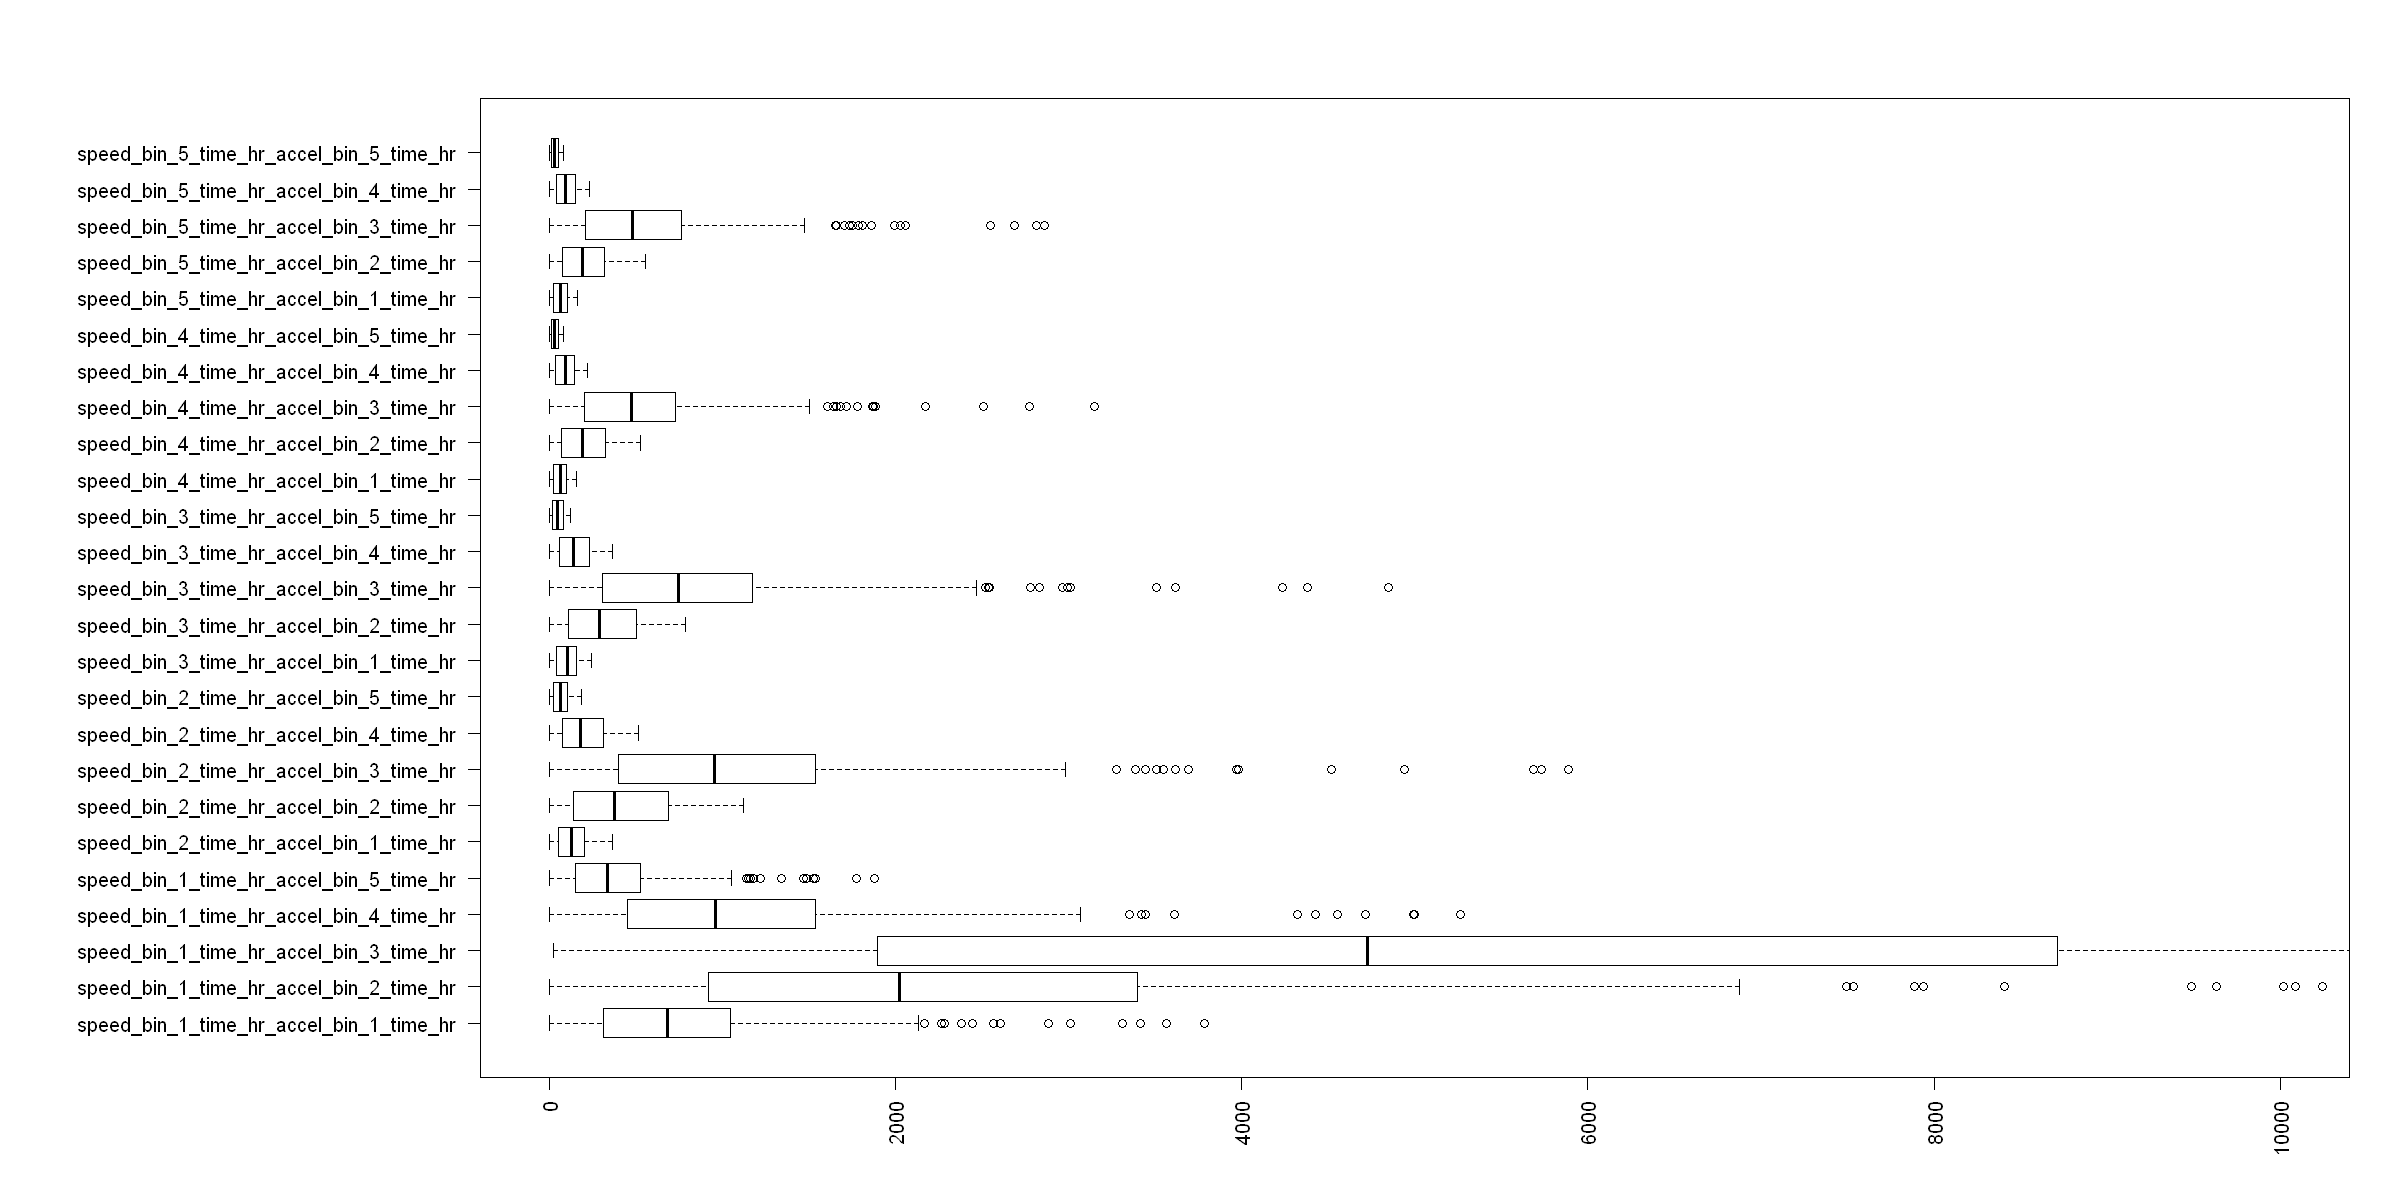

In [36]:
options(repr.plot.width = 20, repr.plot.height = 10)
par(mar=c(5.1, 20, 4.1, 2.1))
boxplot(dfh_train[,23:47], horizontal = TRUE, las=2,ylim = c(0,10000))

In [71]:
ridge <-  linearRidge(energy_kwh ~ ridership + avg_interval_speed_mph +
                         avg_hour_speed_mph +
                         # Speed bin
                         speed_bin_1_time_hr + speed_bin_2_time_hr + 
                         speed_bin_3_time_hr +
                         speed_bin_4_time_hr + speed_bin_5_time_hr +
                         # Acceleration bin
                         accel_bin_1_time_hr + accel_bin_2_time_hr + 
                         accel_bin_3_time_hr + accel_bin_4_time_hr + 
                         accel_bin_5_time_hr +
                         # Interaction term
                         speed_bin_1_time_hr* accel_bin_1_time_hr +
                         speed_bin_1_time_hr* accel_bin_2_time_hr + 
                         speed_bin_1_time_hr* accel_bin_3_time_hr +
                         speed_bin_1_time_hr* accel_bin_4_time_hr +
                         speed_bin_1_time_hr* accel_bin_5_time_hr +
                         speed_bin_2_time_hr* accel_bin_1_time_hr +
                         speed_bin_2_time_hr* accel_bin_2_time_hr + 
                         speed_bin_2_time_hr* accel_bin_3_time_hr +
                         speed_bin_2_time_hr* accel_bin_4_time_hr +
                         speed_bin_2_time_hr* accel_bin_5_time_hr +
                         speed_bin_3_time_hr* accel_bin_1_time_hr +
                         speed_bin_3_time_hr* accel_bin_2_time_hr + 
                         speed_bin_3_time_hr* accel_bin_3_time_hr +
                         speed_bin_3_time_hr* accel_bin_4_time_hr +
                         speed_bin_3_time_hr* accel_bin_5_time_hr +
                         speed_bin_4_time_hr* accel_bin_1_time_hr +
                         speed_bin_4_time_hr* accel_bin_2_time_hr + 
                         speed_bin_4_time_hr* accel_bin_3_time_hr +
                         speed_bin_4_time_hr* accel_bin_4_time_hr +
                         speed_bin_4_time_hr* accel_bin_5_time_hr +
                         speed_bin_5_time_hr* accel_bin_1_time_hr +
                         speed_bin_5_time_hr* accel_bin_2_time_hr + 
                         speed_bin_5_time_hr* accel_bin_3_time_hr +
                         speed_bin_5_time_hr* accel_bin_4_time_hr +
                         speed_bin_5_time_hr* accel_bin_5_time_hr +
                         TAVG, data = dfh_train)

In [72]:
ridge_result = summary(ridge)

In [97]:
ridge_result$summaries

,Estimate,Scaled estimate,Std. Error (scaled),t value (scaled),Pr(>|t|)
(Intercept),3.543916e+01,NA,NA,NA,NA
ridership,1.458015e-05,5.6162563,5.025527,1.1175457,2.637611e-01
avg_interval_speed_mph,-1.231943e-01,-6.9406008,1.909500,3.6347746,2.782238e-04
avg_hour_speed_mph,2.601127e-01,14.8953412,4.231803,3.5198573,4.317790e-04
speed_bin_1_time_hr,1.594596e-02,17.7409510,6.629714,2.6759755,7.451210e-03
speed_bin_2_time_hr,3.143118e-01,55.2260624,6.544468,8.4385865,0.000000e+00
speed_bin_3_time_hr,2.214913e-01,28.0090330,6.972326,4.0171722,5.890067e-05
speed_bin_4_time_hr,-1.182248e-01,-9.5986881,6.584081,1.4578631,1.448783e-01
speed_bin_5_time_hr,5.985253e-01,50.8335617,6.761715,7.5178505,5.573320e-14
accel_bin_1_time_hr,-1.785121e-01,-15.9958619,7.325180,2.1836819,2.898563e-02


In [88]:
# Linear model prediction
pred_ridge <- predict(ridge, dfh_test)

In [90]:
head(dfh_test)

,X,year,month,day,hour,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,...,speed_bin_4_time_hr_accel_bin_1_time_hr,speed_bin_4_time_hr_accel_bin_2_time_hr,speed_bin_4_time_hr_accel_bin_3_time_hr,speed_bin_4_time_hr_accel_bin_4_time_hr,speed_bin_4_time_hr_accel_bin_5_time_hr,speed_bin_5_time_hr_accel_bin_1_time_hr,speed_bin_5_time_hr_accel_bin_2_time_hr,speed_bin_5_time_hr_accel_bin_3_time_hr,speed_bin_5_time_hr_accel_bin_4_time_hr,speed_bin_5_time_hr_accel_bin_5_time_hr
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,6,2019,4,1,10,1157.9279,117.5028,63.17194,21.10694,15.07417,...,90.64326,293.2687,461.0225,136.5020,47.55955,95.69389,309.6096,486.7106,144.1079,47.55955
8,8,2019,4,1,12,987.7224,106.6147,58.56194,19.76028,12.88806,...,68.05960,210.8594,375.2137,100.6710,35.77773,72.48456,224.5686,399.6085,107.2162,35.77773
9,9,2019,4,1,13,947.9956,106.5056,61.61694,16.85667,12.75944,...,67.39690,210.7126,407.2970,105.1045,31.68975,64.89448,202.8889,392.1742,101.2020,31.68975
24,24,2019,4,1,6,1105.2244,106.5978,56.29750,17.13167,14.38444,...,89.28308,264.0664,385.3732,137.2336,44.89904,91.60524,270.9346,395.3964,140.8029,44.89904
26,26,2019,4,1,8,1159.6530,133.5122,78.94389,21.02333,15.58444,...,91.46073,348.9715,600.5712,147.9626,49.19603,83.76944,319.6251,550.0668,135.5198,49.19603
27,27,2019,4,1,9,1287.9592,169.1108,107.52806,25.14306,17.63583,...,105.92323,381.1806,831.5285,170.9924,52.58891,102.93052,370.4109,808.0348,166.1613,52.58891


In [91]:
# Put prediction and obervation into one table
test_compare_ridge = data.frame("Observed Response" = dfh_test$energy_kwh, " Ridge_model" = pred_ridge,
                          "Hour" = dfh_test$hour,"Year" = dfh_test$year,"Day"  = dfh_test$day,"Month" = dfh_test$month)
test_compare_ridge$Date = as.Date(ISOdate(test_compare_ridge$Year, test_compare_ridge$Month, test_compare_ridge$Day,test_compare_ridge$Hour))
test_compare_plot_ridge = melt(test_compare_ridge,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("X.Ridge_model","Observed.Response"),variable.name = "type",value.name = "x")

Warning message in melt(test_compare_ridge, id.vars = c("Hour", "Year", "Day", "Month", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(test_compare_ridge). In the next version, this warning will become an error."


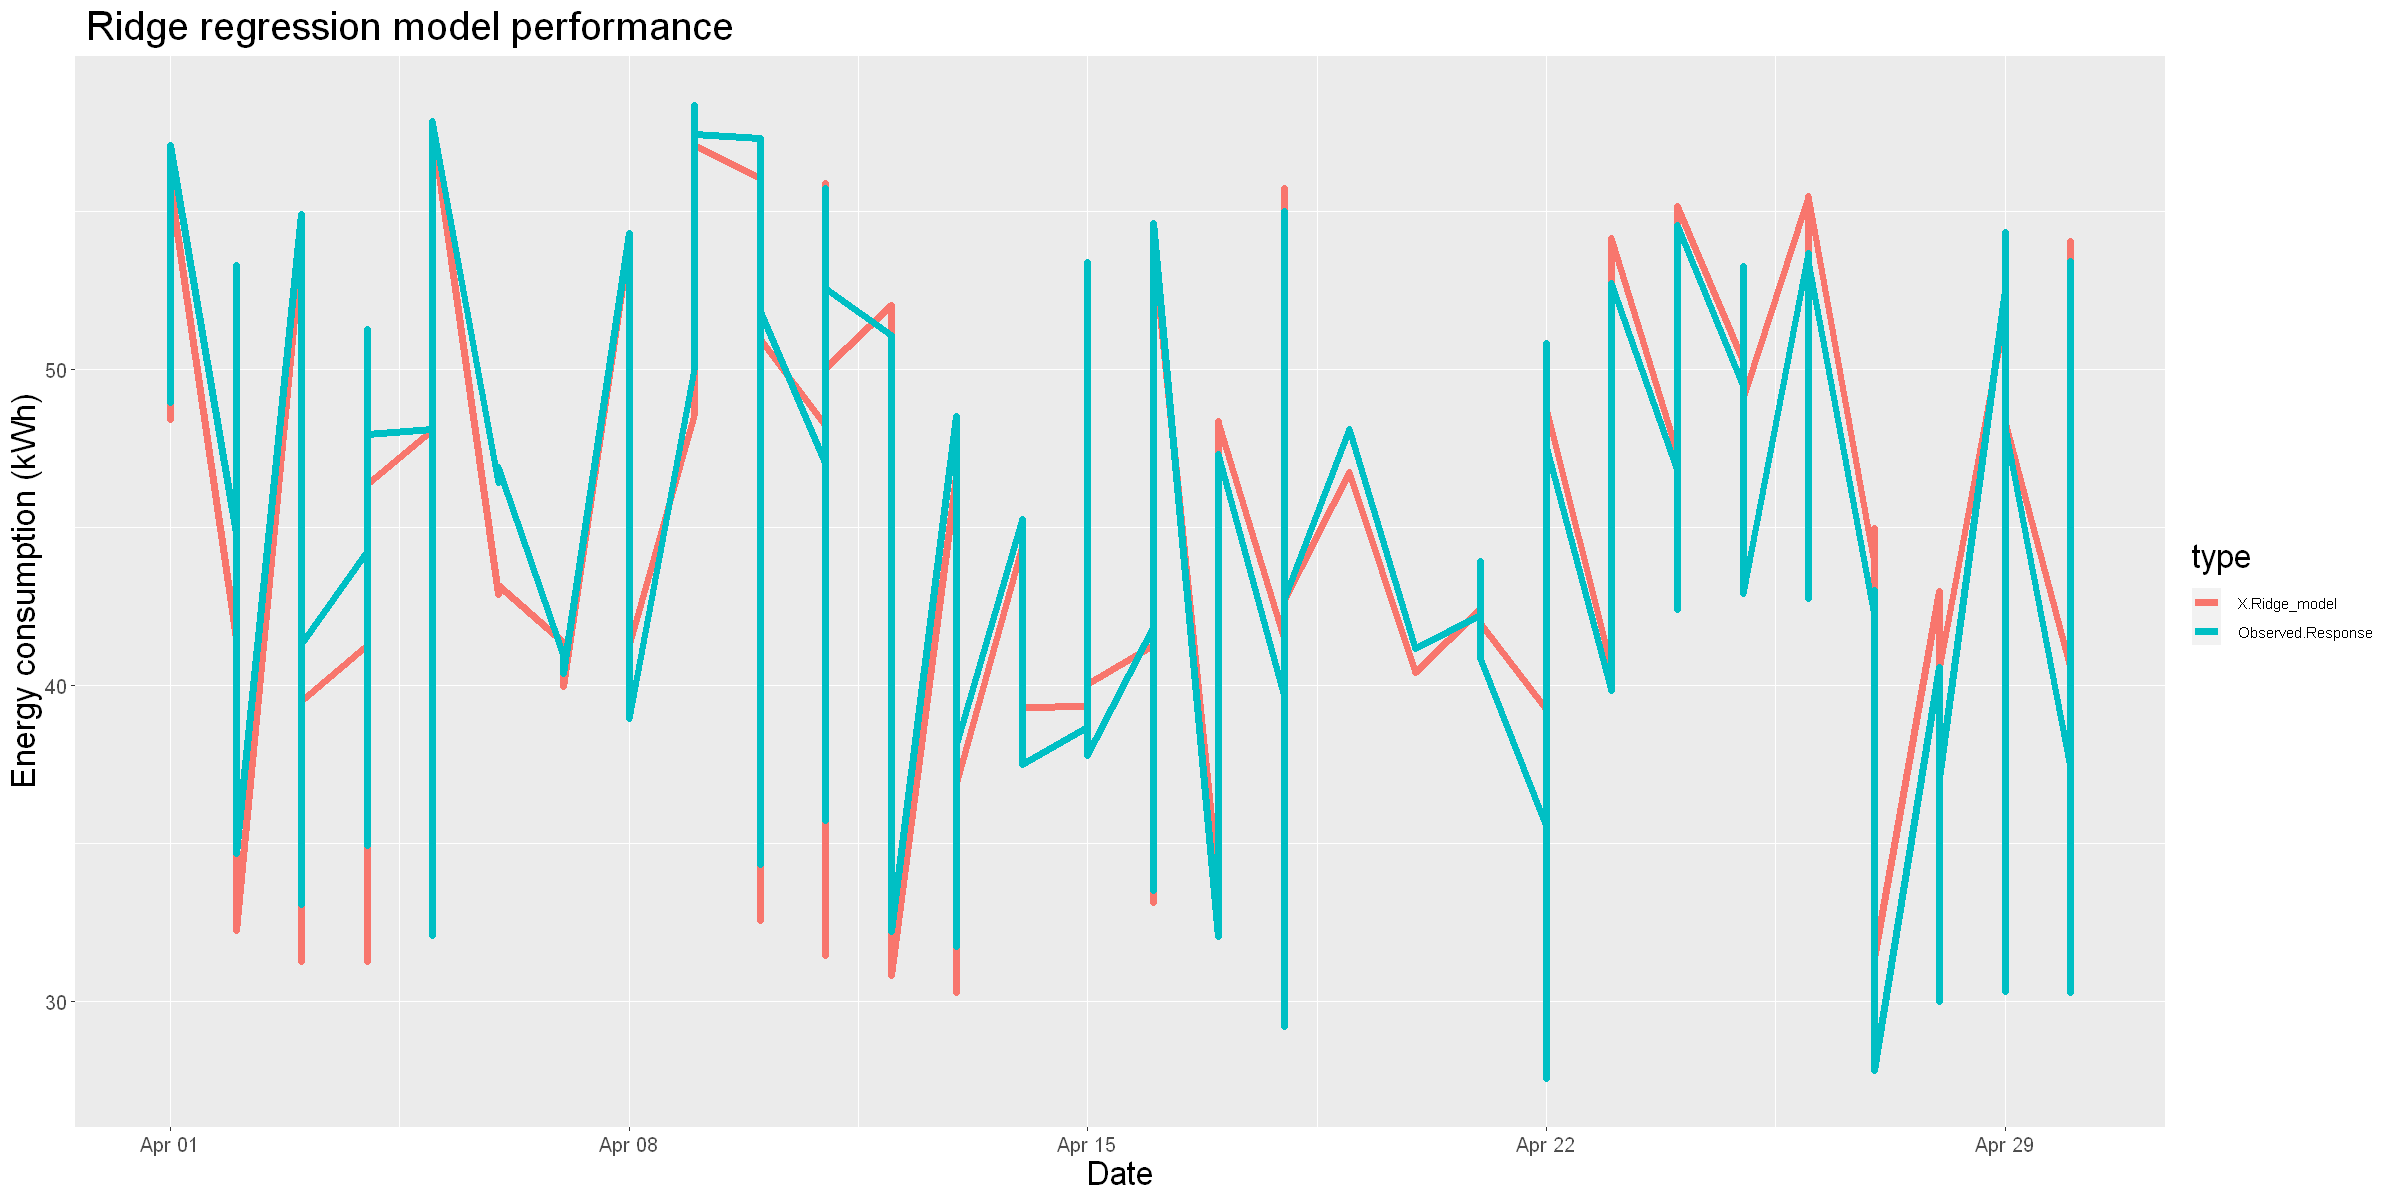

In [93]:
ggplot(test_compare_plot_ridge) + 
 geom_line(aes(x = Date, y = x,color =type,),size = 2,alpha = 1,) +
theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
 labs(title =" Ridge regression model performance ", y = "Energy consumption (kWh)", x = "Date")

In [80]:
ridge_coe = ridge_result$summaries$summary1$coefficients
ridge_coe = data.frame(ridge_coe)
ridge_coe$variables_name = rownames(ridge_coe)

In [86]:
ridge_result$summaries$summary1

,Estimate,Scaled estimate,Std. Error (scaled),t value (scaled),Pr(>|t|)
(Intercept),3.543916e+01,NA,NA,NA,NA
ridership,1.458015e-05,5.6162563,5.025527,1.1175457,2.637611e-01
avg_interval_speed_mph,-1.231943e-01,-6.9406008,1.909500,3.6347746,2.782238e-04
avg_hour_speed_mph,2.601127e-01,14.8953412,4.231803,3.5198573,4.317790e-04
speed_bin_1_time_hr,1.594596e-02,17.7409510,6.629714,2.6759755,7.451210e-03
speed_bin_2_time_hr,3.143118e-01,55.2260624,6.544468,8.4385865,0.000000e+00
speed_bin_3_time_hr,2.214913e-01,28.0090330,6.972326,4.0171722,5.890067e-05
speed_bin_4_time_hr,-1.182248e-01,-9.5986881,6.584081,1.4578631,1.448783e-01
speed_bin_5_time_hr,5.985253e-01,50.8335617,6.761715,7.5178505,5.573320e-14
accel_bin_1_time_hr,-1.785121e-01,-15.9958619,7.325180,2.1836819,2.898563e-02


Warning message:
"Removed 1 rows containing missing values (geom_point)."
Warning message:
"Removed 1 rows containing missing values (geom_point)."


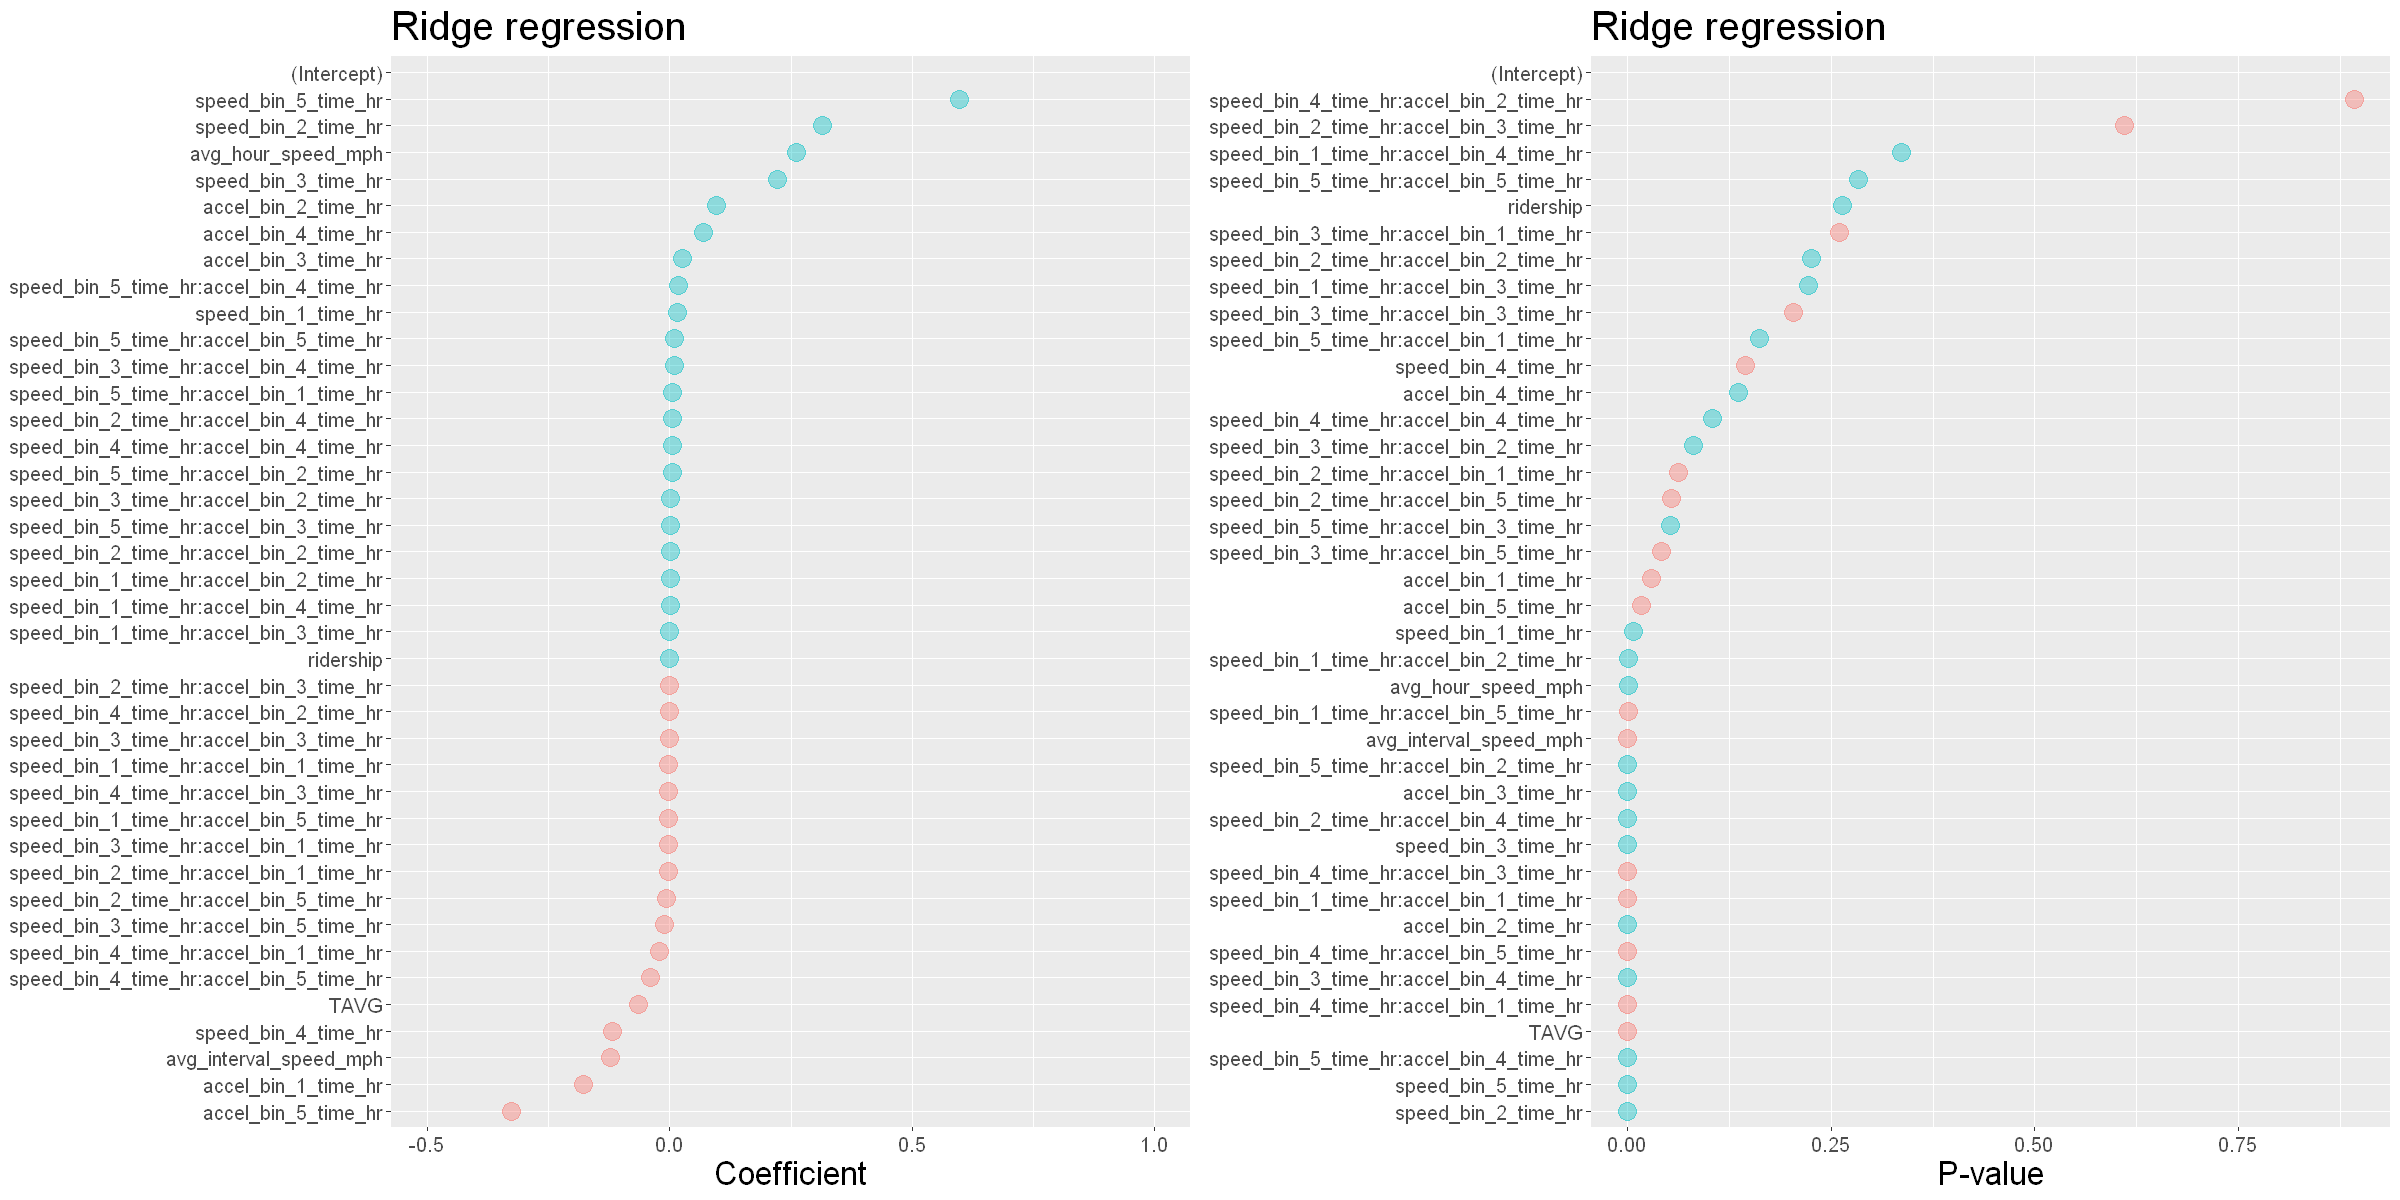

In [85]:
# Plot Ridge regression coef
p1 = ggplot(ridge_coe,aes(Estimate, reorder(variables_name,Estimate), color = Estimate > 0)) +
  xlim(-0.5,1) +
  geom_point(show.legend = FALSE,size = 5,alpha = 0.4) +
  theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
  ggtitle("Ridge regression") +
  xlab("Coefficient") +
  ylab(NULL)
p2 = ggplot(ridge_coe,aes(Pr...t.., reorder(variables_name,Pr...t..), color = Estimate > 0)) +
  geom_point(show.legend = FALSE,size = 5,alpha = 0.4) +
  theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
  ggtitle("Ridge regression") +
  xlab("P-value") +
  ylab(NULL)
options(repr.plot.width = 20, repr.plot.height = 10)
grid.arrange(p1, p2,ncol=2, nrow=1)

In [7]:
head(dfh_train)

,X,year,month,day,hour,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,...,speed_bin_4_time_hr_accel_bin_1_time_hr,speed_bin_4_time_hr_accel_bin_2_time_hr,speed_bin_4_time_hr_accel_bin_3_time_hr,speed_bin_4_time_hr_accel_bin_4_time_hr,speed_bin_4_time_hr_accel_bin_5_time_hr,speed_bin_5_time_hr_accel_bin_1_time_hr,speed_bin_5_time_hr_accel_bin_2_time_hr,speed_bin_5_time_hr_accel_bin_3_time_hr,speed_bin_5_time_hr_accel_bin_4_time_hr,speed_bin_5_time_hr_accel_bin_5_time_hr
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
289,289,2019,4,2,7,1358.18147,157.16583,95.56833,22.818333,16.714722,...,128.300012,440.9888543,704.771633,204.1863164,67.4577519,129.935422,446.6100346,713.75519,206.7890309,67.4577519
106,106,2019,4,13,14,883.56756,129.24944,89.60472,14.616389,10.305000,...,58.257556,192.3842748,490.093978,85.3378100,33.3531437,62.878669,207.6446021,528.96927,92.1069854,33.3531437
628,628,2019,4,6,0,638.91329,53.29472,24.91972,9.256667,7.527500,...,34.588669,72.7085836,93.037256,38.8464854,17.9760549,45.410691,95.4574746,122.14653,51.0006826,17.9760549
650,650,2019,4,6,8,587.35493,63.46194,35.27639,11.220000,7.620000,...,24.688271,78.9773833,125.638654,38.4728167,13.2625586,26.413746,84.4971512,134.41960,41.1617006,13.2625586
405,405,2019,4,24,3,94.84029,18.34389,14.35500,0.215000,1.984444,...,1.091183,0.2913139,8.133388,0.1240065,0.6396937,1.852453,0.4945505,13.80769,0.2105202,0.6396937
103,103,2019,4,13,11,889.58133,160.53694,121.02750,14.127500,10.122500,...,61.231372,202.9798042,731.328298,92.9085203,32.9203032,61.746317,204.6868266,737.47863,93.6898637,32.9203032


# lasso regression

In [10]:
x = scale(x, center = TRUE, scale = TRUE)

In [14]:
colnames(x)

[1] "distance_mile"                          
 [2] "time_hr"                                
 [3] "speed_bin_1_time_hr"                    
 [4] "speed_bin_2_time_hr"                    
 [5] "speed_bin_3_time_hr"                    
 [6] "speed_bin_4_time_hr"                    
 [7] "speed_bin_5_time_hr"                    
 [8] "accel_bin_1_time_hr"                    
 [9] "accel_bin_2_time_hr"                    
[10] "accel_bin_3_time_hr"                    
[11] "accel_bin_4_time_hr"                    
[12] "accel_bin_5_time_hr"                    
[13] "avg_interval_speed_mph"                 
[14] "avg_hour_speed_mph"                     
[15] "ridership"                              
[16] "TAVG"                                   
[17] "speed_bin_1_time_hr_accel_bin_1_time_hr"
[18] "speed_bin_1_time_hr_accel_bin_2_time_hr"
[19] "speed_bin_1_time_hr_accel_bin_3_time_hr"
[20] "speed_bin_1_time_hr_accel_bin_4_time_hr"
[21] "speed_bin_1_time_hr_accel_bin_5_time_hr"
[22] "speed_bin_2_time_hr_accel_bin_1_time_hr"
[23] "speed_bin_2_time_hr_accel_bin_2_time_hr"
[24] "speed_bin_2_time_hr_accel_bin_3_time_hr"
[25] "speed_bin_2_time_hr_accel_bin_4_time_hr"
[26] "speed_bin_2_time_hr_accel_bin_5_time_hr"
[27] "speed_bin_3_time_hr_accel_bin_1_time_hr"
[28] "speed_bin_3_time_hr_accel_bin_2_time_hr"
[29] "speed_bin_3_time_hr_accel_bin_3_time_hr"
[30] "speed_bin_3_time_hr_accel_bin_4_time_hr"
[31] "speed_bin_3_time_hr_accel_bin_5_time_hr"
[32] "speed_bin_4_time_hr_accel_bin_1_time_hr"
[33] "speed_bin_4_time_hr_accel_bin_2_time_hr"
[34] "speed_bin_4_time_hr_accel_bin_3_time_hr"
[35] "speed_bin_4_time_hr_accel_bin_4_time_hr"
[36] "speed_bin_4_time_hr_accel_bin_5_time_hr"
[37] "speed_bin_5_time_hr_accel_bin_1_time_hr"
[38] "speed_bin_5_time_hr_accel_bin_2_time_hr"
[39] "speed_bin_5_time_hr_accel_bin_3_time_hr"
[40] "speed_bin_5_time_hr_accel_bin_4_time_hr"
[41] "speed_bin_5_time_hr_accel_bin_5_time_hr"

In [8]:
x = as.matrix(dfh_train[, -(1:5)])
x = as.matrix(dfh_train[, -22])
y = as.matrix(dfh_train[,"energy_kwh"])

In [12]:
x = x[,-(1:5)]

In [15]:
# First line: Min MSE
# Second line: One standard deviation
set.seed(1)
lasso <- cv.glmnet(x, y, alpha=1, family = 'gaussian',na.rm = TRUE)

In [127]:
lasso$lambda.min

[1] 0.002926717

In [150]:
pred_lasso = predict(fit_cv, s = fit_cv$lambda.min, x_test)

In [152]:
mean((y_test- pred.lasso)^2)

[1] 3.835432

In [153]:
test_compare_lasso = data.frame("Observed Response" = y_test, " Lasso" = pred.lasso)

In [156]:
png("../../figures/Lasso-model-April-2019.png",height=4000,width=5000,res=360)
ggplot(test_compare_lasso) + 
 geom_point(aes(x = Observed.Response, y = X1),size = 5,alpha = 0.4) +
theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
 labs(title =" Lasso Model performance ", y = "Energy consumption (kWh)", x = "Observation")
dev.off()

png 
  2

In [118]:
fit_cv$lambda.min

[1] 0.004663705

In [16]:
get_coe <- function(the_fit,the_lamb){
  Coefficients <- coef(the_fit, s = the_lamb)
  Active.Index <- which(Coefficients != 0)
  Active.Coefficients <- Coefficients[Active.Index]
  re <- data.frame(rownames(Coefficients)[Active.Index],Active.Coefficients)
  re <- data.table('var_names'=rownames(Coefficients)[Active.Index],
                   'coef'=Active.Coefficients)
  re$expcoef <- exp(re$coef)
  return(re[order(expcoef)])
}

In [17]:
Coe = get_coe(lasso,lasso$lambda.min)

In [41]:
library(pheatmap)

Warning message:
"package 'pheatmap' was built under R version 3.6.3"


In [18]:
Coe

var_names,coef,expcoef
<chr>,<dbl>,<dbl>
accel_bin_5_time_hr,-2.9792807513,5.082938e-02
speed_bin_1_time_hr_accel_bin_1_time_hr,-2.5543919846,7.773948e-02
speed_bin_4_time_hr_accel_bin_3_time_hr,-1.0854867824,3.377373e-01
speed_bin_4_time_hr,-0.9332064556,3.932906e-01
speed_bin_2_time_hr_accel_bin_5_time_hr,-0.7283994147,4.826809e-01
speed_bin_4_time_hr_accel_bin_1_time_hr,-0.7031762848,4.950105e-01
TAVG,-0.4501876210,6.375085e-01
avg_interval_speed_mph,-0.2250416542,7.984830e-01
speed_bin_2_time_hr_accel_bin_1_time_hr,-0.0865095615,9.171268e-01


In [39]:
coe_matrix 

,speed_bin_1,speed_bin_2,speed_bin_3,speed_bin_4,speed_bin_5,speed_bin
accel_bin_1,-2.407436000,-0.1630891,0.000000,-1.04705094,0.00000000,0.0000000
accel_bin_2,0.000000000,2.7068229,0.000000,0.00000000,0.00000000,3.8083191
accel_bin_3,0.428547873,-0.8103633,0.000000,-1.82908032,0.01336489,0.0000000
accel_bin_4,0.000000000,0.0000000,2.002345,0.02459116,1.36217587,-0.2848839
accel_bin_5,-0.001320268,-0.4939383,0.000000,0.00000000,0.00000000,4.1621821
acceleration_bin,-0.276035956,1.5093762,1.960518,-0.32385624,-2.40793535,0.0000000


In [25]:
coe_ma_round = round(coe_ma)

In [26]:
coe_ma_round 

,speed_bin_1,speed_bin_2,speed_bin_3,speed_bin_4,speed_bin_5,speed
accel_bin_1,-2,0,0,-1,0,0
accel_bin_2,0,3,0,0,0,4
accel_bin_3,0,-1,0,-2,0,0
accel_bin_4,0,0,2,0,1,0
accel_bin_5,0,0,0,0,0,4
acceleration,0,2,2,0,-2,0


In [23]:
coe_ma = coe_matrix

In [27]:
coe_ma_round  = data.frame(coe_ma_round )

In [28]:
coe_ma_round$ID = rownames(coe_ma_round)

In [29]:
data_coe <- melt(coe_ma_round, id.vars=c("ID"))

Warning message in melt(coe_ma_round, id.vars = c("ID")):
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(coe_ma_round). In the next version, this warning will become an error."


In [30]:
data_coe

ID,variable,value
<chr>,<fct>,<dbl>
accel_bin_1,speed_bin_1,-2
accel_bin_2,speed_bin_1,0
accel_bin_3,speed_bin_1,0
accel_bin_4,speed_bin_1,0
accel_bin_5,speed_bin_1,0
acceleration,speed_bin_1,0
accel_bin_1,speed_bin_2,0
accel_bin_2,speed_bin_2,3
accel_bin_3,speed_bin_2,-1


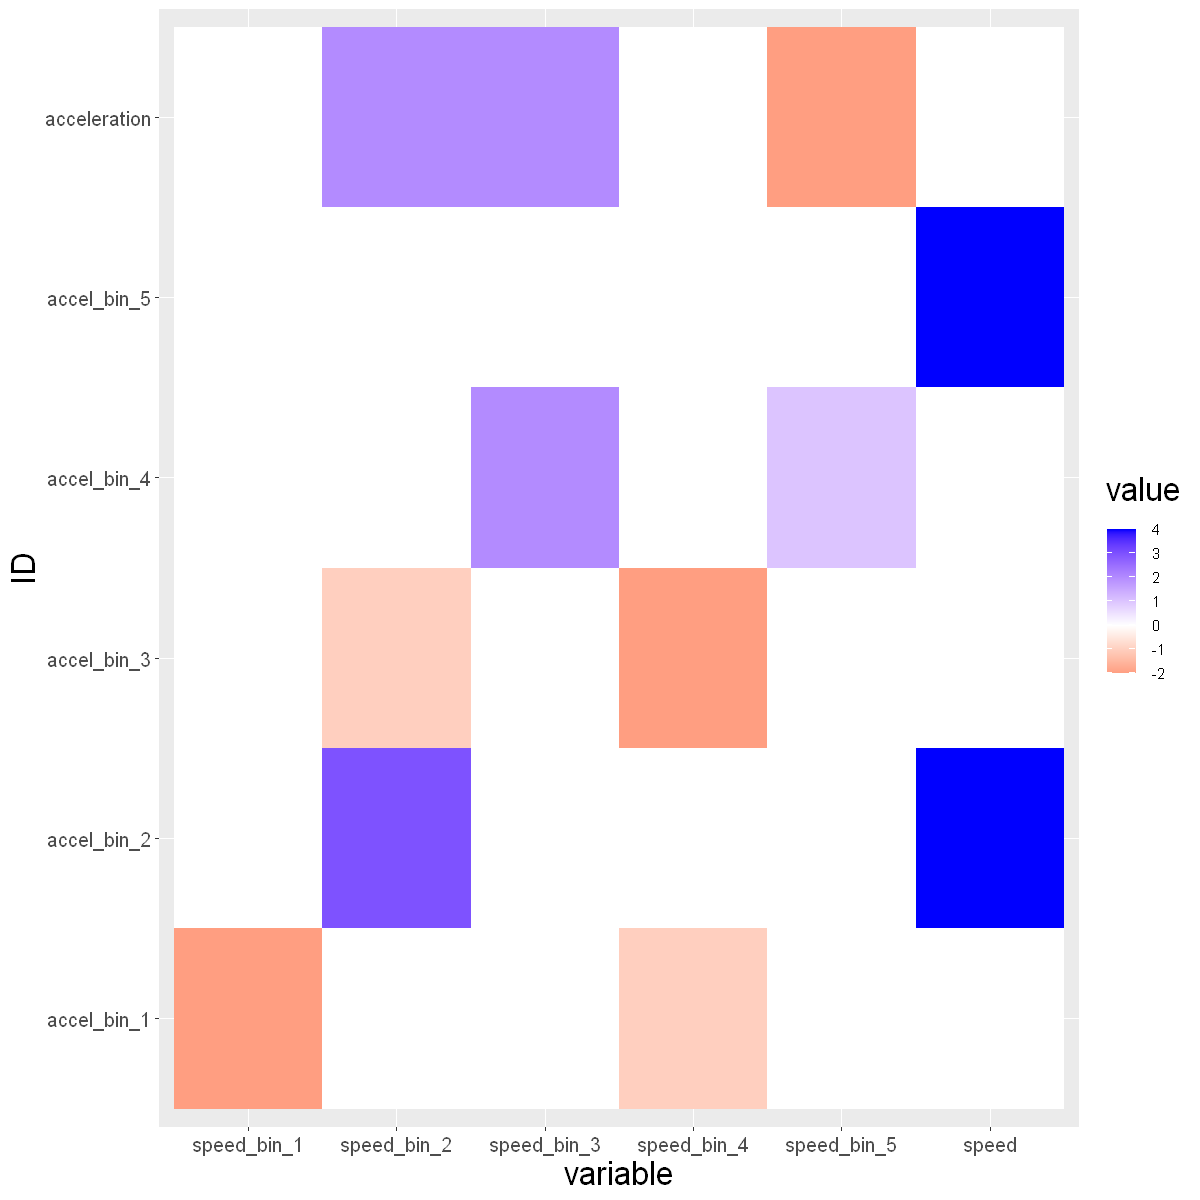

In [35]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(data_coe, aes(x=variable,y=ID)) + geom_tile(aes(fill=value)) + 
theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20)) +
scale_fill_gradient2(low = "red", high = "blue",mid = "white")

In [ ]:
data$ID <- rownames(data)

In [ ]:
# heat map
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(coe_matrix, aes(x=variable,y=ID)) + geom_tile(aes(fill=value)) +
scale_fill_gradient(low = "white", high = "red")

In [48]:
fix(coe_matrix)

In [19]:
coe_matrix = matrix(0,6,6)

In [20]:
row = c("accel_bin_1","accel_bin_2","accel_bin_3","accel_bin_4","accel_bin_5","acceleration")
column = c("speed_bin_1","speed_bin_2","speed_bin_3","speed_bin_4","speed_bin_5","speed")

In [21]:
dimnames(coe_matrix)=list(row,column)

In [53]:
lasso_model = lm(energy_kwh ~ ridership + avg_interval_speed_mph +
                         avg_hour_speed_mph +
                         # Speed bin
                         speed_bin_2_time_hr + 
                         speed_bin_3_time_hr +
                         speed_bin_4_time_hr + speed_bin_5_time_hr +
                         # Acceleration bin
                         accel_bin_1_time_hr + accel_bin_2_time_hr + 
                         accel_bin_3_time_hr + 
                         accel_bin_4_time_hr + 
                         accel_bin_5_time_hr +
                         # Interaction term
                         #speed_bin_1_time_hr* accel_bin_1_time_hr +
                         speed_bin_1_time_hr* accel_bin_2_time_hr + 
                        # speed_bin_1_time_hr* accel_bin_3_time_hr +
                         #speed_bin_1_time_hr* accel_bin_5_time_hr +
                         #speed_bin_2_time_hr* accel_bin_1_time_hr +
                         #speed_bin_2_time_hr* accel_bin_3_time_hr +
                         #speed_bin_2_time_hr* accel_bin_5_time_hr +
                         #speed_bin_3_time_hr* accel_bin_4_time_hr +
                         #speed_bin_4_time_hr* accel_bin_1_time_hr +
                         speed_bin_4_time_hr* accel_bin_3_time_hr +
                         speed_bin_4_time_hr* accel_bin_4_time_hr + 
                         #speed_bin_5_time_hr* accel_bin_3_time_hr +
                         speed_bin_5_time_hr* accel_bin_4_time_hr +
                         TAVG,data = dfh_train) #select=TRUE weekends_weekday)

In [54]:
lasso_result = summary(lasso_model)

In [55]:
lasso_result


Call:
lm(formula = energy_kwh ~ ridership + avg_interval_speed_mph + 
    avg_hour_speed_mph + speed_bin_2_time_hr + speed_bin_3_time_hr + 
    speed_bin_4_time_hr + speed_bin_5_time_hr + accel_bin_1_time_hr + 
    accel_bin_2_time_hr + accel_bin_3_time_hr + accel_bin_4_time_hr + 
    accel_bin_5_time_hr + speed_bin_1_time_hr * accel_bin_2_time_hr + 
    speed_bin_4_time_hr * accel_bin_3_time_hr + speed_bin_4_time_hr * 
    accel_bin_4_time_hr + speed_bin_5_time_hr * accel_bin_4_time_hr + 
    TAVG, data = dfh_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4294 -1.2150 -0.0833  1.2600  6.7306 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                              3.562e+01  1.020e+00  34.915  < 2e-16
ridership                               -2.077e-06  1.578e-05  -0.132  0.89535
avg_interval_speed_mph                  -1.085e-01  3.699e-02  -2.933  0.00351
avg_hour_speed_mph                       1.775e-01 

In [37]:
# Linear model prediction
pred_lasso <- predict.lm(lasso_model, dfh_test)

In [57]:
# Put prediction and obervation into one table
test_compare = data.frame("Observed Response" = dfh_test$energy_kwh, " Lasso_model" = pred_lasso,
                          "Hour" = dfh_test$hour,"Year" = dfh_test$year,"Day"  = dfh_test$day,"Month" = dfh_test$month)
test_compare$Date = as.Date(ISOdate(test_compare$Year, test_compare$Month, test_compare$Day,test_compare$Hour))
test_compare_plot_lasso = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("X.Lasso_model","Observed.Response"),variable.name = "type",value.name = "x")

Warning message in melt(test_compare, id.vars = c("Hour", "Year", "Day", "Month", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(test_compare). In the next version, this warning will become an error."


In [56]:
lasso_coe = lasso_result$coefficients
lasso_coe = data.frame(lasso_coe)
lasso_coe$variables_name = rownames(lasso_coe)

Warning message:
"Removed 3 rows containing missing values (geom_point)."


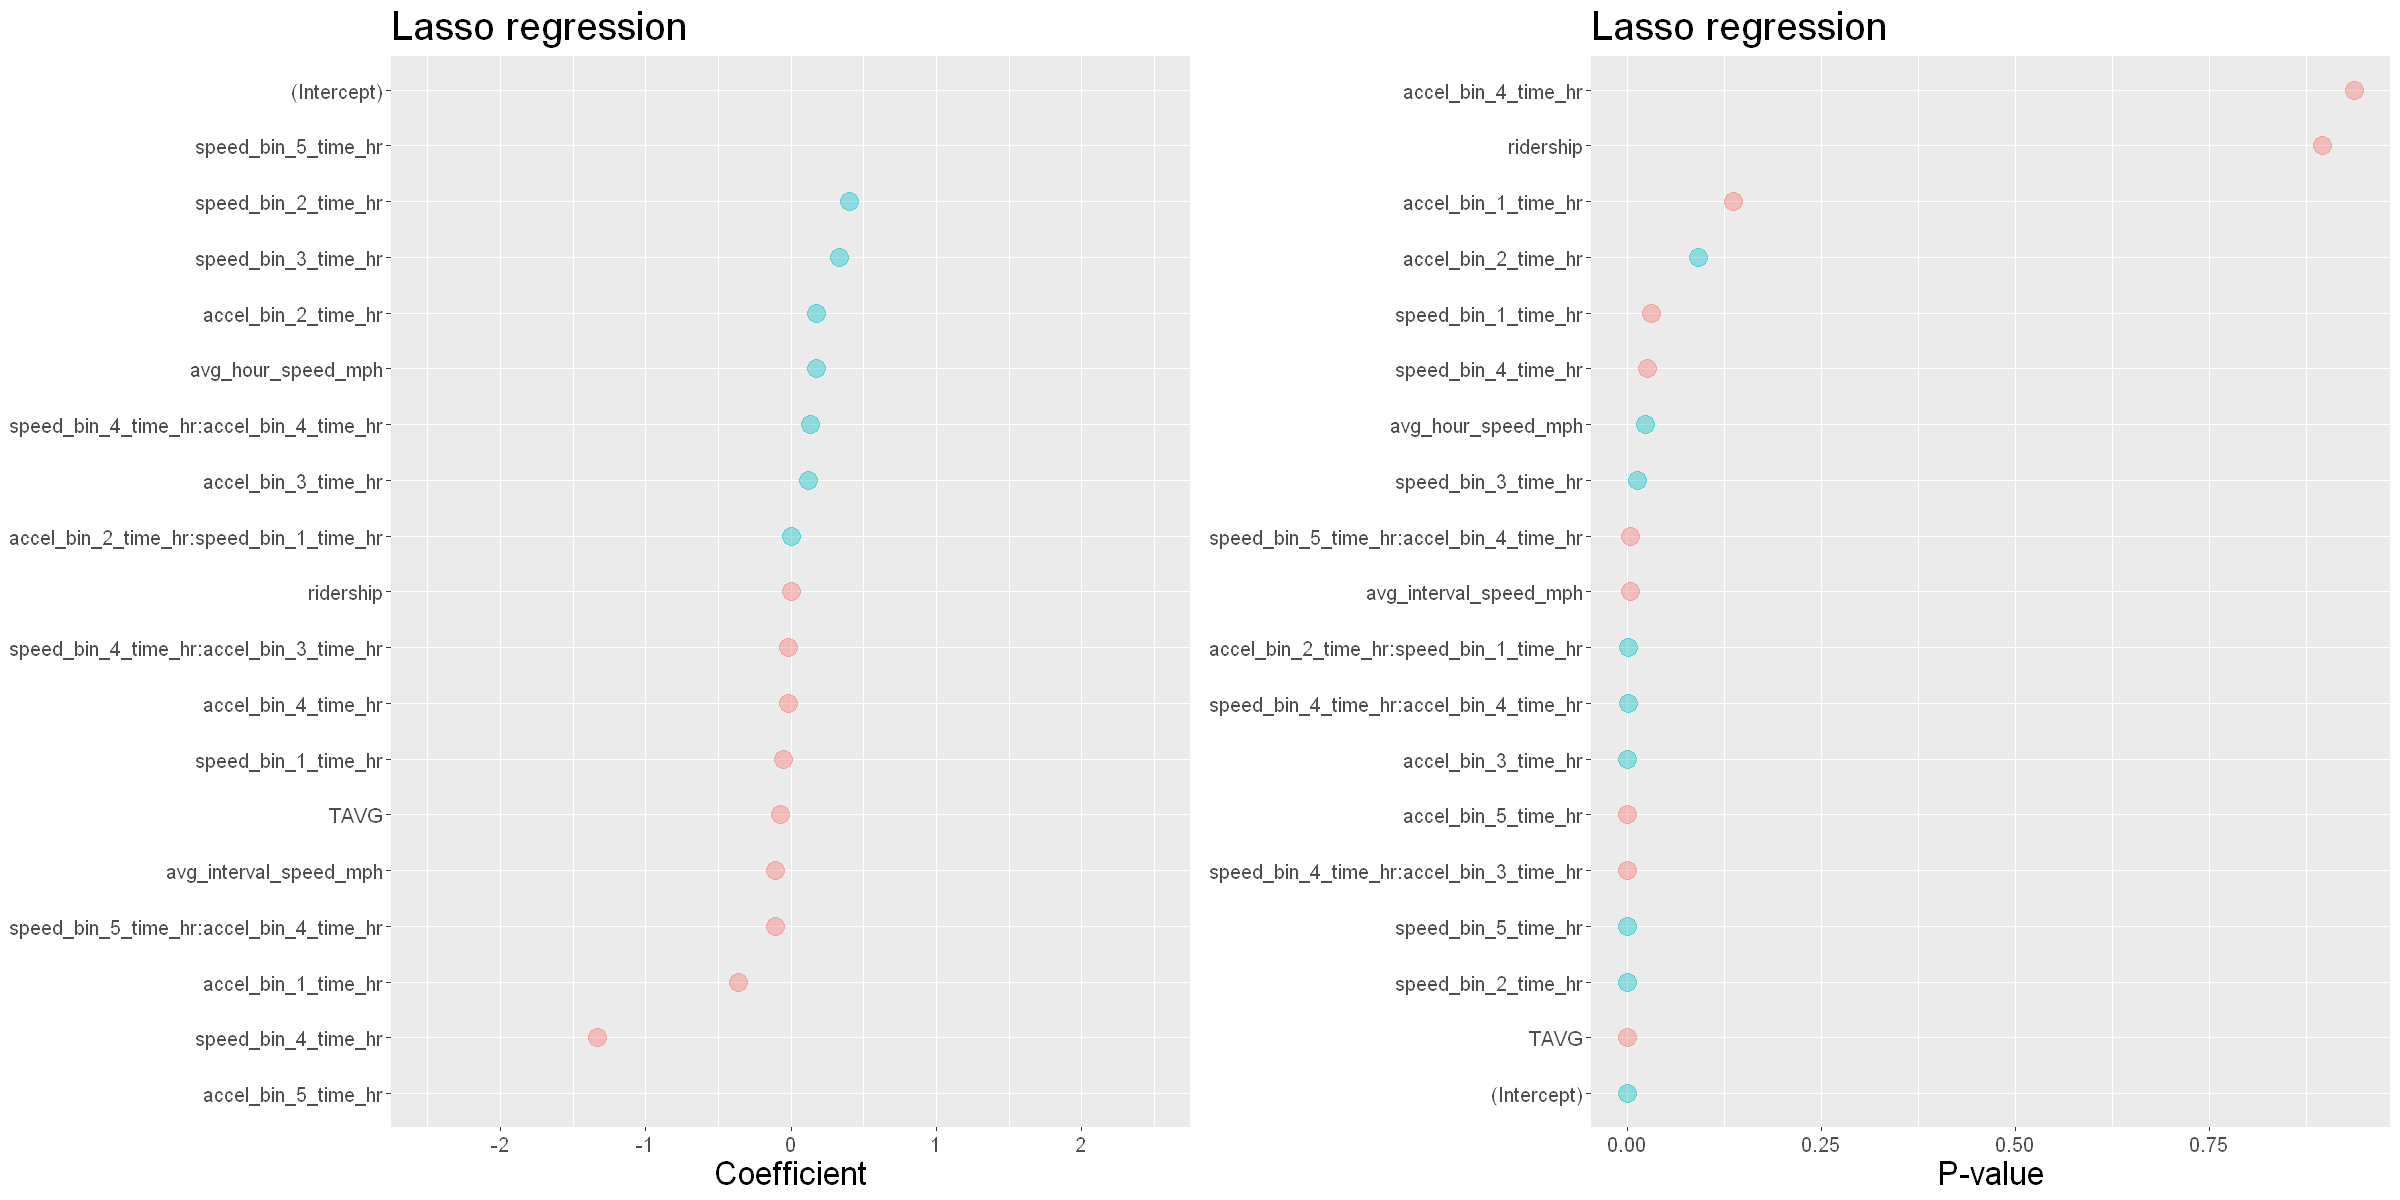

In [59]:
# Plot Ridge regression coef
p1 = ggplot(lasso_coe,aes(Estimate, reorder(variables_name,Estimate), color = Estimate > 0)) +
  xlim(-2.5,2.5) +
  geom_point(show.legend = FALSE,size = 5,alpha = 0.4) +
  theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
  ggtitle("Lasso regression") +
  xlab("Coefficient") +
  ylab(NULL)
p2 = ggplot(lasso_coe,aes(Pr...t.., reorder(variables_name,Pr...t..), color = Estimate > 0)) +
  geom_point(show.legend = FALSE,size = 5,alpha = 0.4) +
  theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
  ggtitle("Lasso regression") +
  xlab("P-value") +
  ylab(NULL)
options(repr.plot.width = 20, repr.plot.height = 10)
grid.arrange(p1, p2,ncol=2, nrow=1)

In [132]:
summary(lasso_model)


Call:
lm(formula = energy_kwh ~ ridership + avg_interval_speed_mph + 
    avg_hour_speed_mph + speed_bin_2_time_hr + speed_bin_3_time_hr + 
    speed_bin_4_time_hr + speed_bin_5_time_hr + accel_bin_1_time_hr + 
    accel_bin_2_time_hr + accel_bin_3_time_hr + accel_bin_4_time_hr + 
    accel_bin_5_time_hr + speed_bin_1_time_hr * accel_bin_1_time_hr + 
    speed_bin_1_time_hr * accel_bin_2_time_hr + speed_bin_1_time_hr * 
    accel_bin_3_time_hr + speed_bin_1_time_hr * accel_bin_5_time_hr + 
    speed_bin_2_time_hr * accel_bin_1_time_hr + speed_bin_2_time_hr * 
    accel_bin_3_time_hr + speed_bin_2_time_hr * accel_bin_5_time_hr + 
    speed_bin_3_time_hr * accel_bin_4_time_hr + speed_bin_4_time_hr * 
    accel_bin_1_time_hr + speed_bin_4_time_hr * accel_bin_3_time_hr + 
    speed_bin_4_time_hr * accel_bin_4_time_hr + speed_bin_5_time_hr * 
    accel_bin_3_time_hr + speed_bin_5_time_hr * accel_bin_4_time_hr + 
    TAVG, data = dfh_train)

Residuals:
    Min      1Q  Median      3Q     Ma

In [144]:
head(test_compare_ridge)

,Observed.Response,X.Ridge_model,Hour,Year,Day,Month,Date,lasso
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<date>,<dbl>
6,53.894,52.47229,10,2019,1,4,2019-04-01,52.97250
8,48.963,49.83913,12,2019,1,4,2019-04-01,50.46229
9,49.200,48.41793,13,2019,1,4,2019-04-01,48.76782
24,53.737,50.44343,6,2019,1,4,2019-04-01,51.64440
26,53.998,52.67680,8,2019,1,4,2019-04-01,51.56936
27,57.082,55.85514,9,2019,1,4,2019-04-01,55.21052


In [143]:
test_compare_ridge$lasso = pred_lasso

In [146]:
test_compare_plot_lasso = melt(test_compare_ridge,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("Observed.Response","lasso"),variable.name = "type",value.name = "x")

Warning message in melt(test_compare_ridge, id.vars = c("Hour", "Year", "Day", "Month", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(test_compare_ridge). In the next version, this warning will become an error."


In [148]:
test_compare_plot_lasso_ridge =  melt(test_compare_ridge,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("X.Ridge_model","lasso"),variable.name = "type",value.name = "x")

Warning message in melt(test_compare_ridge, id.vars = c("Hour", "Year", "Day", "Month", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(test_compare_ridge). In the next version, this warning will become an error."


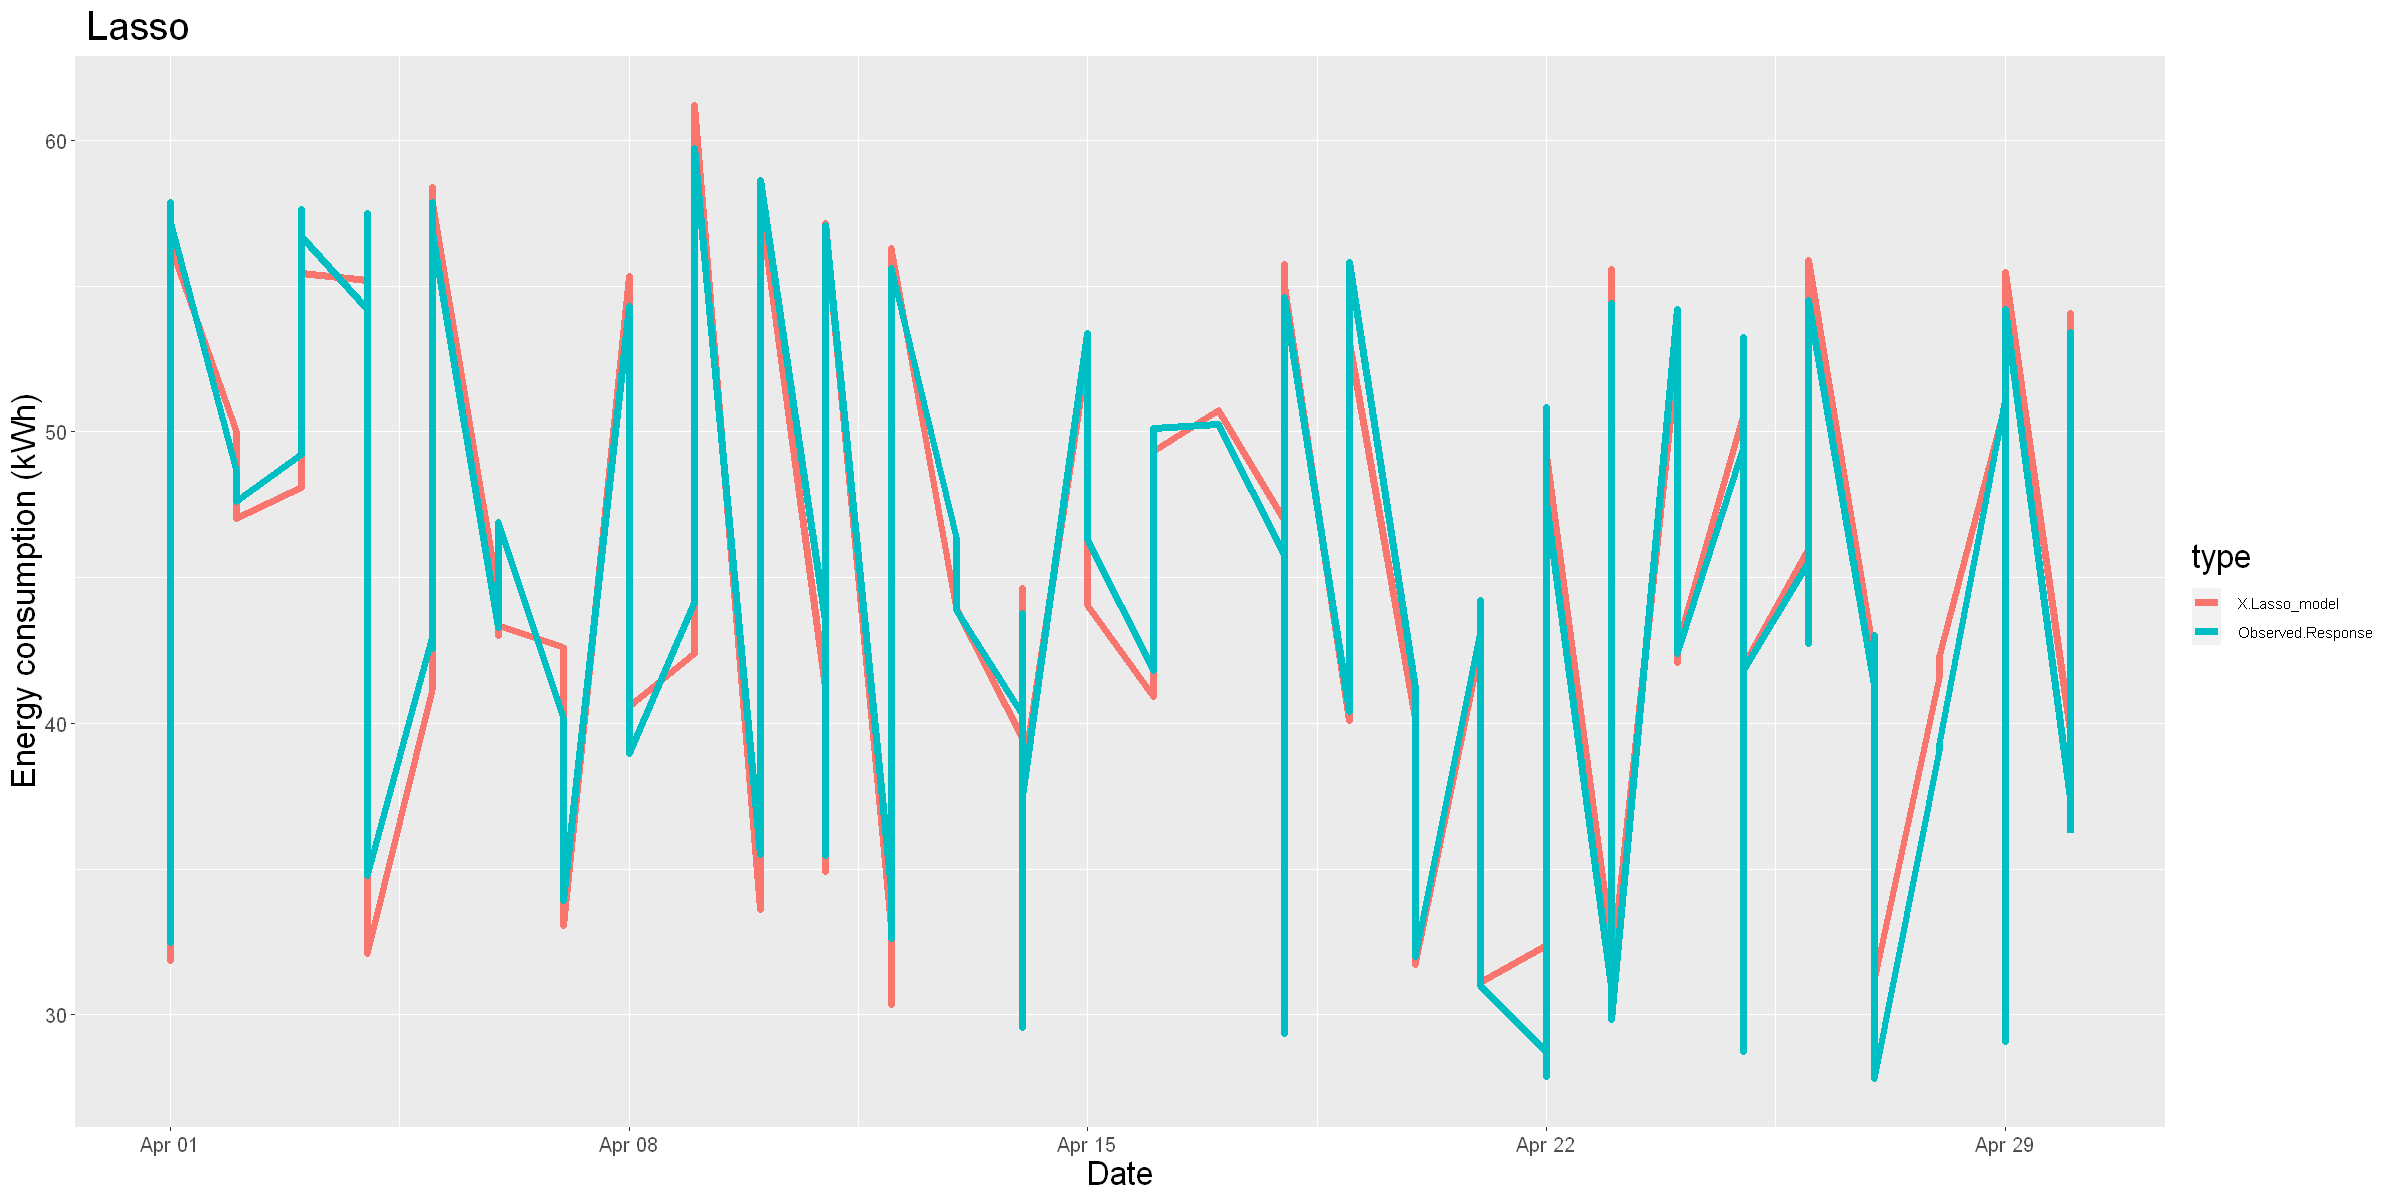

In [58]:
ggplot(test_compare_plot_lasso) + 
 geom_line(aes(x = Date, y = x,color = type,),size = 2,alpha = 1,) +
theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
 labs(title =" Lasso", y = "Energy consumption (kWh)", x = "Date")

In [140]:
png("../../figures/lasso coefficient.png",height=4000,width=4000,res=360)
ggplot(Coe,aes(coef, reorder(var_names,coef), color = coef > 0)) +
   xlim(-5, 5) +
  geom_point(show.legend = FALSE,size = 5,alpha = 0.4) +
  theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
  ggtitle("Variables") +
  xlab("Coefficient") +
  ylab(NULL)
dev.off()

Warning message:
"Removed 1 rows containing missing values (geom_point)."


png 
  2

In [126]:
coef(fit_cv, s = "lambda.1se") %>%
  #tidy() %>%
  #filter(row != "(Intercept)") %>%
  ggplot(aes(value, reorder(row, value), color = value > 0)) +
  geom_point(show.legend = FALSE) +
  ggtitle("Influential variables") +
  xlab("Coefficient") +
  ylab(NULL)

ERROR: Error: `data` must be a data frame, or other object coercible by `fortify()`, not an S4 object with class dgCMatrix


In [97]:
get_plot<- function(the_fit_cv,the_lamb,toplot = seq(1,50,2)){
    Coefficients <- coef(the_fit_cv, s = the_lamb)
    Active.Index <- which(Coefficients != 0)
    coeall <- coef(the_fit_cv, s = the_fit_cv$lambda[toplot])
    coe <- coeall[Active.Index[-1],]
    ylims=c(-max(abs(coe)),max(abs(coe)))
    sp <- spline(log(the_fit_cv$lambda[toplot]),coe[1,],n=100)
    plot(sp,type='l',col =1,lty=1, 
         ylim = ylims,ylab = 'Coefficient', xlab = 'log(lambda)') 
    abline(h=0) 
    for(i in c(2:nrow(coe))){
        lines(spline(log(the_fit_cv$lambda[toplot]),coe[i,],n=1000),
              col =i,lty=i)
    }
    legend("bottomright",legend=rownames(coe),col=c(1:nrow(coe)),
           lty=c(1:nrow(coe)),
           cex=0.5)
}

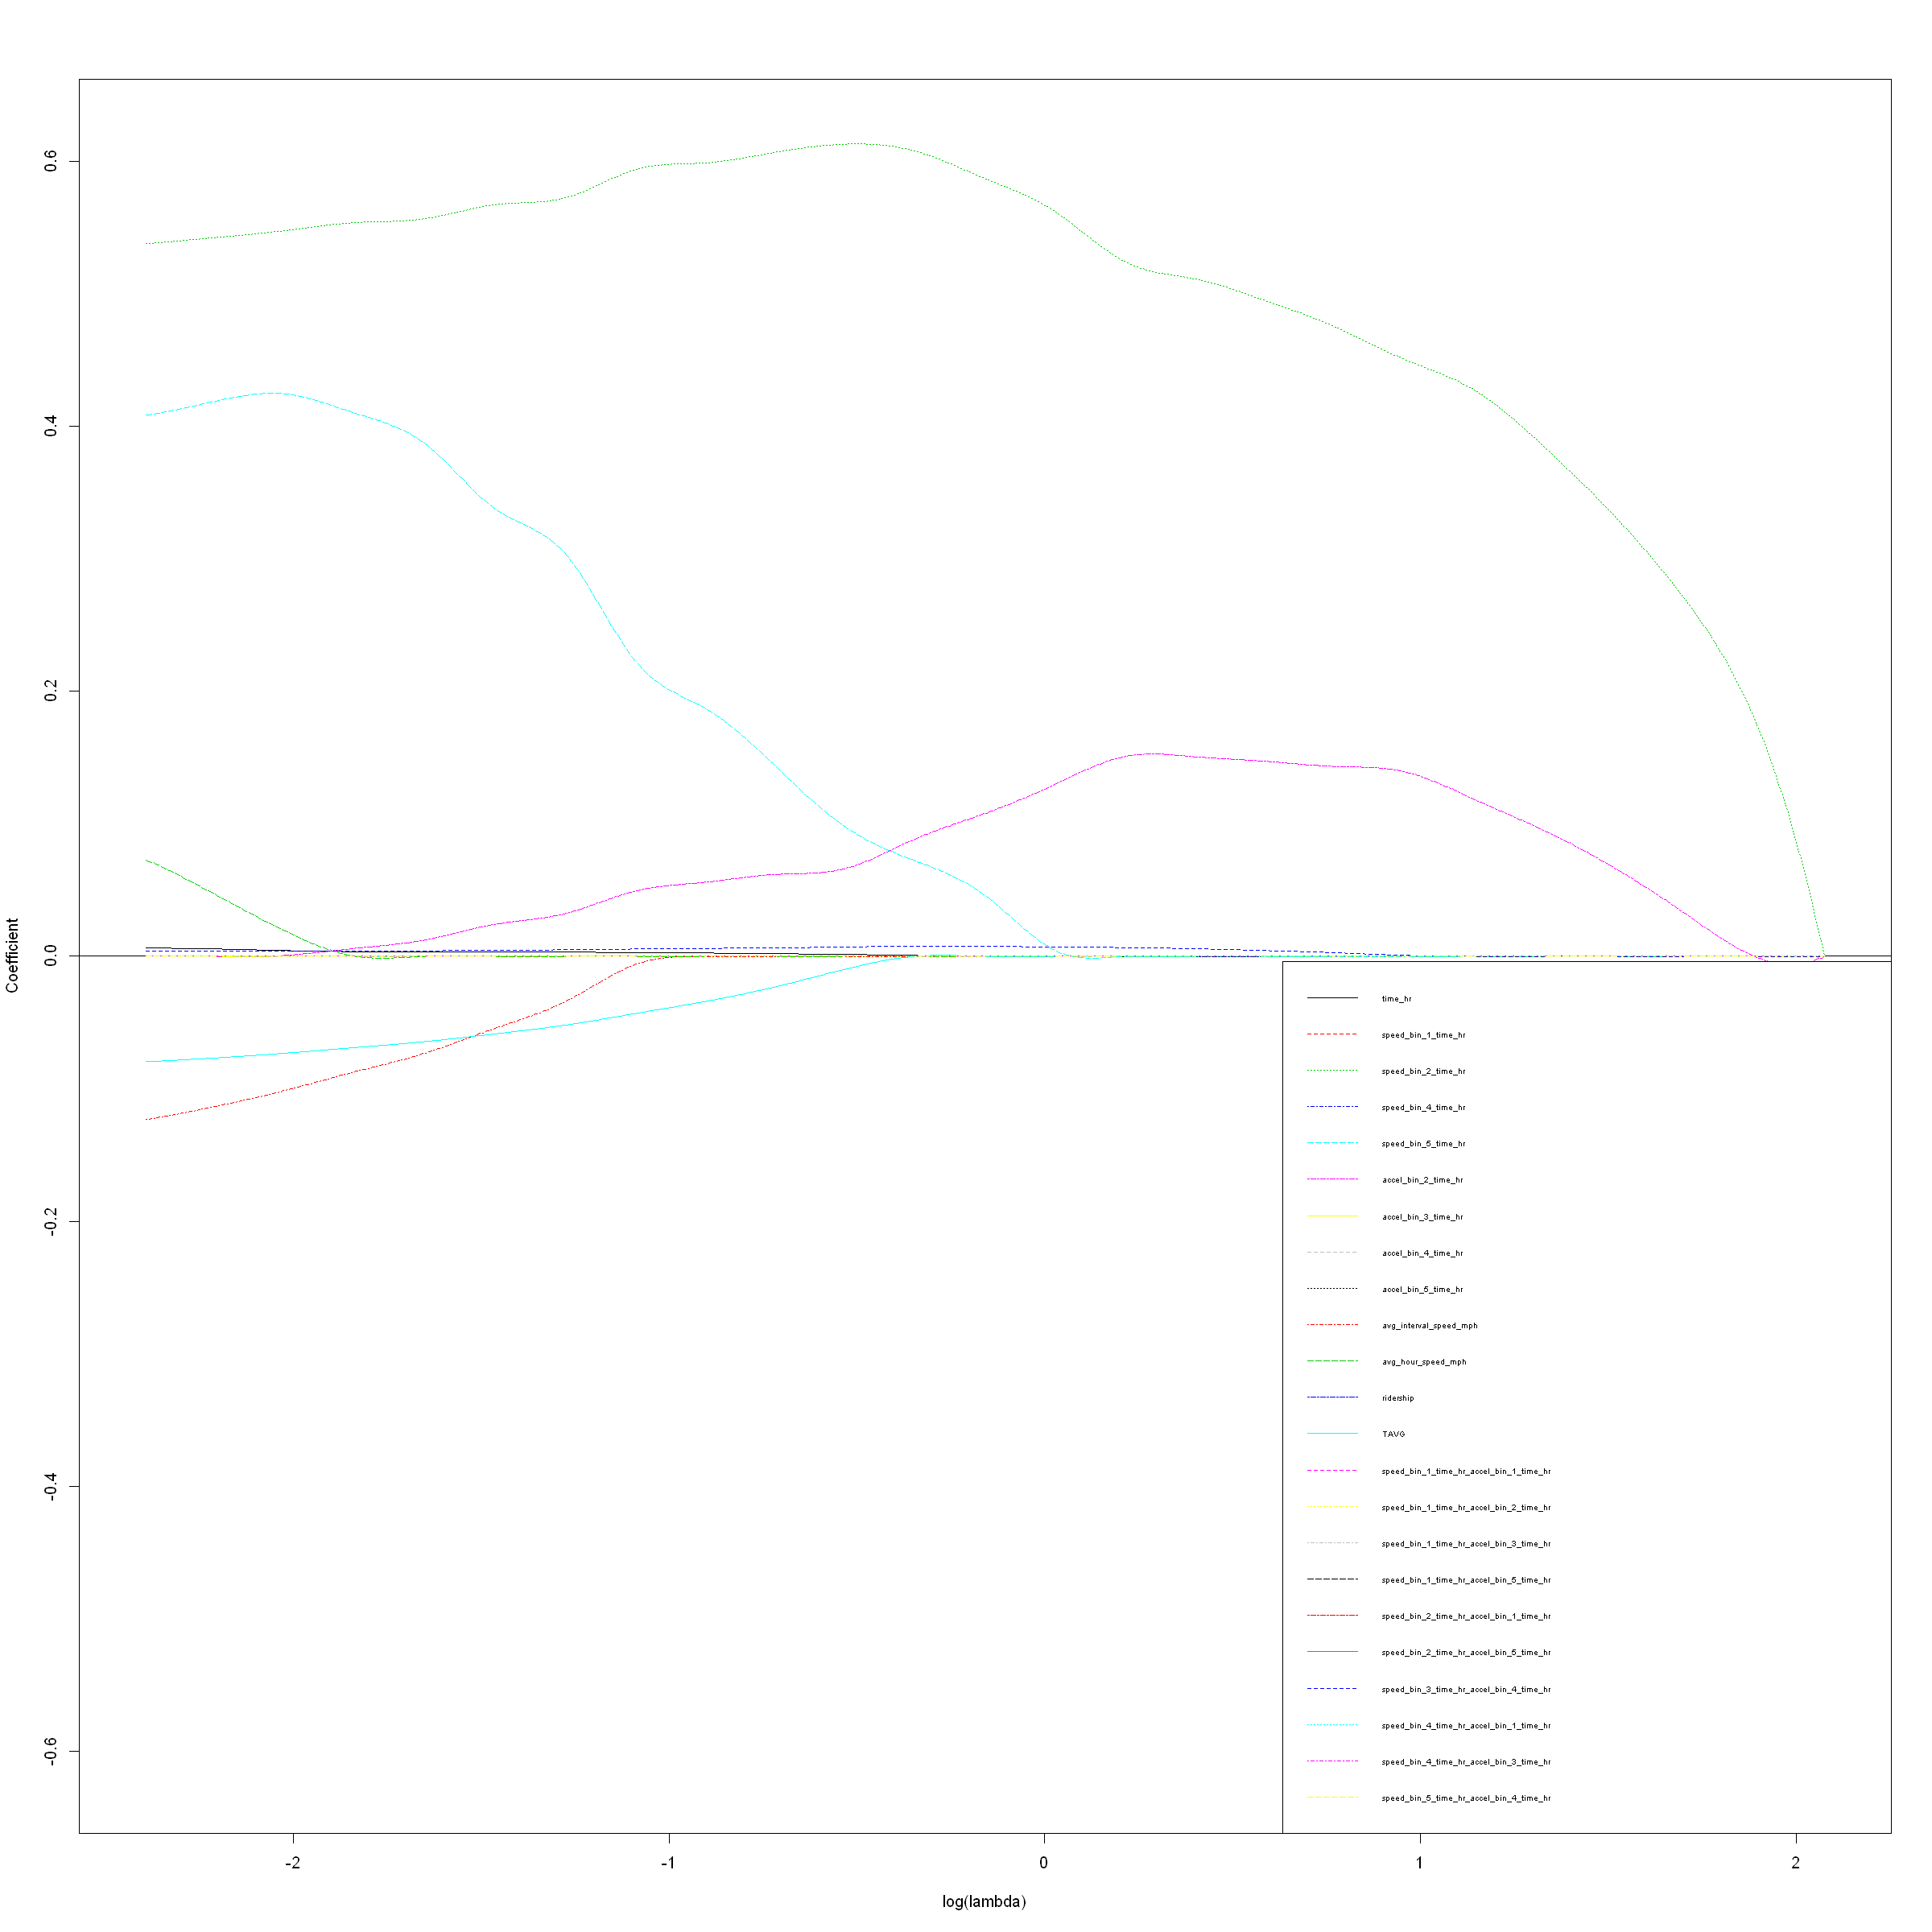

In [103]:
options(repr.plot.width = 20, repr.plot.height = 20)
get_plot(fit_cv,exp(log(fit_cv$lambda.min)-1))

In [80]:
summary(lar)

,Df,Rss,Cp
,<dbl>,<dbl>,<dbl>
0,1,37338.792,13470.20332
1,2,26074.557,9244.44804
2,3,7012.696,2092.04409
3,4,3534.526,788.59818
4,5,3244.761,681.84160
5,6,2766.414,504.30597
6,7,2757.266,502.87237
7,8,2631.351,457.61314
8,9,2304.164,336.81184


In [83]:
coef <- coef.lars(lar,mode="step",s = 51) #s = step+1
coef[coef!=0]

speed_bin_2_time_hr                     speed_bin_3_time_hr 
                           1.411368e+00                           -2.432262e-01 
                    speed_bin_4_time_hr                     speed_bin_5_time_hr 
                          -1.123114e+00                            1.483775e+00 
                    accel_bin_1_time_hr                     accel_bin_2_time_hr 
                           1.072137e+00                            7.954892e-01 
                    accel_bin_3_time_hr                     accel_bin_4_time_hr 
                           9.423048e-02                           -2.072694e+00 
                    accel_bin_5_time_hr                  avg_interval_speed_mph 
                          -3.835002e+00                           -1.620148e-01 
                     avg_hour_speed_mph                               ridership 
                           3.340336e-01                            4.821247e-06 
                                   TAVG speed_bin_1_time_hr_accel_bin_2_time_hr 
                          -6.662678e-02                            4.713347e-03 
speed_bin_1_time_hr_accel_bin_3_time_hr speed_bin_1_time_hr_accel_bin_4_time_hr 
                           1.944284e-05                           -4.087787e-03 
speed_bin_1_time_hr_accel_bin_5_time_hr speed_bin_2_time_hr_accel_bin_1_time_hr 
                          -1.319466e-02                           -9.367552e-02 
speed_bin_2_time_hr_accel_bin_3_time_hr speed_bin_3_time_hr_accel_bin_2_time_hr 
                          -6.623792e-04                           -4.266731e-02 
speed_bin_3_time_hr_accel_bin_3_time_hr speed_bin_3_time_hr_accel_bin_4_time_hr 
                          -1.462926e-03                            1.375742e-01 
speed_bin_4_time_hr_accel_bin_3_time_hr speed_bin_4_time_hr_accel_bin_4_time_hr 
                          -8.919299e-03                            9.162711e-02 
speed_bin_4_time_hr_accel_bin_5_time_hr speed_bin_5_time_hr_accel_bin_2_time_hr 
                           2.972738e-01                           -4.319173e-02

In [173]:
png("../../figures/ridge-April-2019.png",height=5000,width=5000,res=360)
matplot(modelFit_hour_linear_ridge$lambda, t(modelFit_hour_linear_ridge$coef), xlab = expression(lamdba), ylab = "Cofficients",

type = "l", lty = 1:20)

abline(v = modelFit_hour_linear_ridge$lambda[which.min(modelFit_hour_linear_ridge$GCV)])
dev.off()

png 
  2

In [168]:
modelFit_hour_linear_ridge$lambda[which.min(modelFit_hour_linear_ridge$GCV)]
modelFit_hour_linear_ridge$coef[which.min(modelFit_hour_linear_ridge$GCV)]

[1] 1

[1] 0.3052366

In [170]:
png("../../figures/ridge-April-2019.png",height=5000,width=5000,res=360)
plot(modelFit_hour_linear_ridge$lambda, modelFit_hour_linear_ridge$GCV, type = "l", xlab = expression(lambda), 
    ylab = expression(beta))
abline(v = modelFit_hour_linear_ridge$lambda[which.min(modelFit_hour_linear_ridge$GCV)])
dev.off()

png 
  2

In [143]:
# Put prediction and obervation into one table
test_compare = data.frame("Observed Response" = dfh_test$energy_kwh, " Linear_model" = pred1,
                          "Hour"=dfh_test$hour,"Year" = dfh_test$year,"Day" =dfh_test$day,"Month"=dfh_test$month)

In [144]:
test_compare$Date = as.Date(ISOdate(test_compare$Year, test_compare$Month, test_compare$Day,test_compare$Hour))

In [145]:
head(test_compare)

,Observed.Response,X.Linear_model,Hour,Year,Day,Month,Date
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<date>
10,50.928,51.84622,14,2019,1,4,2019-04-01
11,54.272,54.41932,15,2019,1,4,2019-04-01
13,57.666,56.57205,17,2019,1,4,2019-04-01
14,57.869,54.20101,18,2019,1,4,2019-04-01
21,32.478,32.14679,3,2019,1,4,2019-04-01
25,57.236,55.91901,7,2019,1,4,2019-04-01


In [ ]:
colnames()

In [147]:
test_compare1 = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("X.Linear_model","Observed.Response"),variable.name = "type",value.name = "x")

In [155]:
png("../../figures/Linear-model-April-2019.png",height=4000,width=5000,res=360)
ggplot(test_compare1) + 
 geom_line(aes(x=Date, y=x,color = type),size = 1,alpha = 0.4) +
theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
 labs(title =" Linear Model performance ", y = "Energy consumption (kWh)", x = "Date")
dev.off()

png 
  2

### Experimental part

In [ ]:
# Put prediction and obervation into one table
test_compare = data.frame("Observed Response" = dfh_test$energy_kwh, " Linear_model" = pred_linear,
                          "Hour" = dfh_test$hour,"Year" = dfh_test$year,"Day"  = dfh_test$day,"Month" = dfh_test$month)
test_compare$Date = as.Date(ISOdate(test_compare$Year, test_compare$Month, test_compare$Day,test_compare$Hour))
test_compare_plot = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("X.Linear_model","Observed.Response"),variable.name = "type",value.name = "x")

In [157]:
head(test_compare_ridge)

,Observed.Response,X.Ridge_model,Hour,Year,Day,Month,Date,lasso
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<date>,<dbl>
6,53.894,52.47229,10,2019,1,4,2019-04-01,52.97250
8,48.963,49.83913,12,2019,1,4,2019-04-01,50.46229
9,49.200,48.41793,13,2019,1,4,2019-04-01,48.76782
24,53.737,50.44343,6,2019,1,4,2019-04-01,51.64440
26,53.998,52.67680,8,2019,1,4,2019-04-01,51.56936
27,57.082,55.85514,9,2019,1,4,2019-04-01,55.21052


In [154]:
test_compare

,Observed.Response,X.Linear_model,Hour,Year,Day,Month,Date
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<date>
5,35.110,NA,1,2019,1,4,2019-04-01
6,53.894,53.02807,10,2019,1,4,2019-04-01
8,48.963,50.33695,12,2019,1,4,2019-04-01
9,49.200,49.19285,13,2019,1,4,2019-04-01
16,32.387,NA,2,2019,1,4,2019-04-01
24,53.737,52.87299,6,2019,1,4,2019-04-01
26,53.998,51.05688,8,2019,1,4,2019-04-01
27,57.082,56.03783,9,2019,1,4,2019-04-01
37,57.311,56.13676,17,2019,10,4,2019-04-10


In [158]:
sst <- sum((test_compare_ridge$X.Ridge_model - mean(test_compare_ridge$Observed.Response))^2)
sse <- sum((test_compare_ridge$X.Ridge_model - test_compare_ridge$Observed.Response)^2)
rsq <-1- sse / sst

In [159]:
rsq

[1] 0.9403494

# Statisitics analysis

In [155]:
# Calculate the MSE of ridge
sqrt(mean((test_compare$Observed.Response - test_compare$X.Linear_model)^2,na.rm = TRUE))
#Calculate MAPE of ridge
mean(abs((test_compare$Observed.Response - test_compare$X.Linear_model)/test_compare$Observed.Response),na.rm =TRUE) * 100

[1] 1.527196

[1] 2.966252

Warning message:
"Removed 4 rows containing missing values (geom_point)."


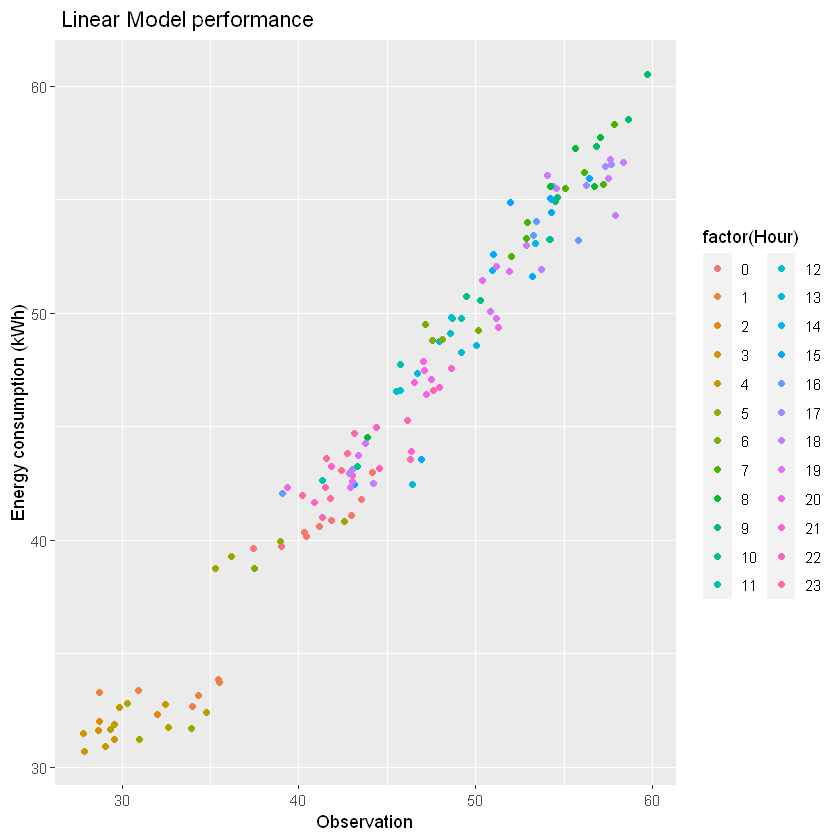

In [17]:
ggplot(test_compare) + 
 geom_point(aes(x=Observed.Response, y=X.Model1,color=factor(Hour))) +
 labs(title =" Linear Model performance ", y = "Energy consumption (kWh)", x = "Observation")